In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

# import data modelling libraries
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz

# import kFold library
from sklearn.model_selection import KFold

# import feature selection library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# import metrics library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
beacon_file = "iBeacon_RSSI_Labeled.csv"
beacon_data = pd.read_csv(beacon_file, sep = ",", header = None)

In [3]:
beacon_data

0                    1      2      3      4      5      6      7   \
0     location                 date  b3001  b3002  b3003  b3004  b3005  b3006   
1          O02  10-18-2016 11:15:21   -200   -200   -200   -200   -200    -78   
2          P01  10-18-2016 11:15:19   -200   -200   -200   -200   -200    -78   
3          P01  10-18-2016 11:15:17   -200   -200   -200   -200   -200    -77   
4          P01  10-18-2016 11:15:15   -200   -200   -200   -200   -200    -77   
...        ...                  ...    ...    ...    ...    ...    ...    ...   
1416       I01    4-19-2016 9:37:46   -200    -76   -200   -200   -200   -200   
1417       I01    4-19-2016 9:37:39   -200    -72   -200   -200   -200   -200   
1418       I01    4-19-2016 9:37:36   -200    -67   -200   -200   -200   -200   
1419       I01    4-19-2016 9:37:26   -200    -79   -200   -200   -200   -200   
1420       I01    4-19-2016 9:37:23   -200    -75   -200   -200   -200   -200   

         8      9      10     11     12     13     14  
0     b3007  b3008  b3009  b3010  b3011  b3012  b3013  
1      -200   -200   -200   -200   -200   -200   -200  
2      -200   -200   -200   -200   -200   -200   -200  
3      -200   -200   -200   -200   -200   -200   -200  
4      -200   -200   -200   -200   -200   -200   -200  
...     ...    ...    ...    ...    ...    ...    ...  
1416   -200   -200   -200   -200   -200   -200   -200  
1417   -200   -200   -200   -200   -200   -200   -200  
1418   -200   -200   -200   -200   -200   -200   -200  
1419   -200   -200   -200   -200   -200   -200   -200  
1420   -200   -200   -200   -200   -200   -200   -200  

[1421 rows x 15 columns]

In [4]:
# boolean variable to stop the below code from running multiple times
# Only run this line once.
coderun = False

In [5]:
# Setting the first row as the column's name
if not coderun:
    column_head = beacon_data.iloc[0]
    beacon_data = beacon_data[1:]
    beacon_data.columns = column_head
    coderun = True

In [6]:
beacon_data

0    location                 date b3001 b3002 b3003 b3004 b3005 b3006 b3007  \
1         O02  10-18-2016 11:15:21  -200  -200  -200  -200  -200   -78  -200   
2         P01  10-18-2016 11:15:19  -200  -200  -200  -200  -200   -78  -200   
3         P01  10-18-2016 11:15:17  -200  -200  -200  -200  -200   -77  -200   
4         P01  10-18-2016 11:15:15  -200  -200  -200  -200  -200   -77  -200   
5         P01  10-18-2016 11:15:13  -200  -200  -200  -200  -200   -77  -200   
...       ...                  ...   ...   ...   ...   ...   ...   ...   ...   
1416      I01    4-19-2016 9:37:46  -200   -76  -200  -200  -200  -200  -200   
1417      I01    4-19-2016 9:37:39  -200   -72  -200  -200  -200  -200  -200   
1418      I01    4-19-2016 9:37:36  -200   -67  -200  -200  -200  -200  -200   
1419      I01    4-19-2016 9:37:26  -200   -79  -200  -200  -200  -200  -200   
1420      I01    4-19-2016 9:37:23  -200   -75  -200  -200  -200  -200  -200   

0    b3008 b3009 b3010 b3011 b3012 b3013  
1     -200  -200  -200  -200  -200  -200  
2     -200  -200  -200  -200  -200  -200  
3     -200  -200  -200  -200  -200  -200  
4     -200  -200  -200  -200  -200  -200  
5     -200  -200  -200  -200  -200  -200  
...    ...   ...   ...   ...   ...   ...  
1416  -200  -200  -200  -200  -200  -200  
1417  -200  -200  -200  -200  -200  -200  
1418  -200  -200  -200  -200  -200  -200  
1419  -200  -200  -200  -200  -200  -200  
1420  -200  -200  -200  -200  -200  -200  

[1420 rows x 15 columns]

In [7]:
# Removing date column as it is not useful for data exploration and data modelling
beacon_data = beacon_data.drop("date", axis=1)

In [8]:
beacon_data

0    location b3001 b3002 b3003 b3004 b3005 b3006 b3007 b3008 b3009 b3010  \
1         O02  -200  -200  -200  -200  -200   -78  -200  -200  -200  -200   
2         P01  -200  -200  -200  -200  -200   -78  -200  -200  -200  -200   
3         P01  -200  -200  -200  -200  -200   -77  -200  -200  -200  -200   
4         P01  -200  -200  -200  -200  -200   -77  -200  -200  -200  -200   
5         P01  -200  -200  -200  -200  -200   -77  -200  -200  -200  -200   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1416      I01  -200   -76  -200  -200  -200  -200  -200  -200  -200  -200   
1417      I01  -200   -72  -200  -200  -200  -200  -200  -200  -200  -200   
1418      I01  -200   -67  -200  -200  -200  -200  -200  -200  -200  -200   
1419      I01  -200   -79  -200  -200  -200  -200  -200  -200  -200  -200   
1420      I01  -200   -75  -200  -200  -200  -200  -200  -200  -200  -200   

0    b3011 b3012 b3013  
1     -200  -200  -200  
2     -200  -200  -200  
3     -200  -200  -200  
4     -200  -200  -200  
5     -200  -200  -200  
...    ...   ...   ...  
1416  -200  -200  -200  
1417  -200  -200  -200  
1418  -200  -200  -200  
1419  -200  -200  -200  
1420  -200  -200  -200  

[1420 rows x 14 columns]

In [9]:
# Checks if there is any missing data in any columns

In [10]:
locationIndex = beacon_data.columns.get_loc("location")
print(locationIndex)

lastBeaconIndex = beacon_data.columns.get_loc("b3013")
print(lastBeaconIndex)

0
13


In [11]:
columnNo = locationIndex

for i in range(locationIndex, lastBeaconIndex + 1):
    columnName = beacon_data.columns[columnNo]
    print(columnName)
    print()
    print(beacon_data[columnName].value_counts())
    print(beacon_data[columnName].value_counts().sum())
    print()
    
    columnNo = columnNo + 1

location

K04    34
J04    32
J06    29
J07    27
I06    27
       ..
T01     4
S15     3
L08     3
L09     2
O01     2
Name: location, Length: 105, dtype: int64
1420

b3001

-200    1395
-78        5
-80        4
-81        3
-77        3
-79        2
-72        1
-73        1
-71        1
-67        1
-68        1
-74        1
-70        1
-75        1
Name: b3001, dtype: int64
1420

b3002

-200    923
-80      34
-78      34
-77      32
-75      31
-76      31
-74      29
-81      28
-72      27
-79      27
-66      25
-73      25
-65      23
-70      19
-67      18
-71      17
-68      16
-69      15
-64      14
-63      12
-198     11
-62       6
-82       5
-84       3
-83       3
-60       3
-86       2
-59       2
-61       2
-85       2
-87       1
Name: b3002, dtype: int64
1420

b3003

-200    1140
-79       35
-78       32
-80       27
-81       23
-75       22
-76       21
-77       17
-82       13
-74       13
-72        9
-71        7
-69        6
-66        5
-70        

In [12]:
# All columns show 1420. Therefore there is no empty values.

In [13]:
# Since -200 is referring to beacons that are out of range & missing values, we can add 200 to all data to set these values to 0

In [14]:
firstBeaconIndex = beacon_data.columns.get_loc("b3001")
print(firstBeaconIndex)

1


In [15]:
for index, row in beacon_data.iterrows():
    columnNo = firstBeaconIndex
    while(columnNo <= lastBeaconIndex):
        columnName = beacon_data.columns[columnNo]
        # Get the cell value
        cellValue_in_string = beacon_data[columnName][index]
        
        # Add 200 to the cell value
        cellValue = int(cellValue_in_string) + 200
        
        # Update the cell value
        beacon_data.at[index, columnName] = cellValue
        
        columnNo = columnNo + 1

In [16]:
beacon_data

0    location b3001 b3002 b3003 b3004 b3005 b3006 b3007 b3008 b3009 b3010  \
1         O02     0     0     0     0     0   122     0     0     0     0   
2         P01     0     0     0     0     0   122     0     0     0     0   
3         P01     0     0     0     0     0   123     0     0     0     0   
4         P01     0     0     0     0     0   123     0     0     0     0   
5         P01     0     0     0     0     0   123     0     0     0     0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1416      I01     0   124     0     0     0     0     0     0     0     0   
1417      I01     0   128     0     0     0     0     0     0     0     0   
1418      I01     0   133     0     0     0     0     0     0     0     0   
1419      I01     0   121     0     0     0     0     0     0     0     0   
1420      I01     0   125     0     0     0     0     0     0     0     0   

0    b3011 b3012 b3013  
1        0     0     0  
2        0     0     0  
3        0     0     0  
4        0     0     0  
5        0     0     0  
...    ...   ...   ...  
1416     0     0     0  
1417     0     0     0  
1418     0     0     0  
1419     0     0     0  
1420     0     0     0  

[1420 rows x 14 columns]

In [17]:
# Check that there are no negative values/values below 0, since 0 should be the lowest value.

columnNo = firstBeaconIndex

for i in range(firstBeaconIndex, lastBeaconIndex + 1):
    columnName = beacon_data.columns[columnNo]
    print(columnName)
    print()
    print(beacon_data[columnName].value_counts())
    print(beacon_data[columnName].value_counts().sum())
    print()
    
    columnNo = columnNo + 1

b3001

0      1395
122       5
120       4
123       3
119       3
121       2
133       1
132       1
130       1
129       1
128       1
127       1
126       1
125       1
Name: b3001, dtype: int64
1420

b3002

0      923
120     34
122     34
123     32
125     31
124     31
126     29
119     28
128     27
121     27
134     25
127     25
135     23
130     19
133     18
129     17
132     16
131     15
136     14
137     12
2       11
138      6
118      5
117      3
116      3
140      3
139      2
115      2
114      2
141      2
113      1
Name: b3002, dtype: int64
1420

b3003

0      1140
121      35
122      32
120      27
119      23
125      22
124      21
123      17
118      13
126      13
128       9
129       7
131       6
137       5
130       5
127       5
134       5
136       5
139       4
115       3
117       3
140       3
132       3
138       2
135       2
133       2
114       2
113       2
116       1
143       1
112       1
144       1
Name: b3003, dtype: in

In [18]:
# As expected, there are no values below 0/no negative values.

In [19]:
# Data exploration

In [20]:
# Comparing all beacons with the location

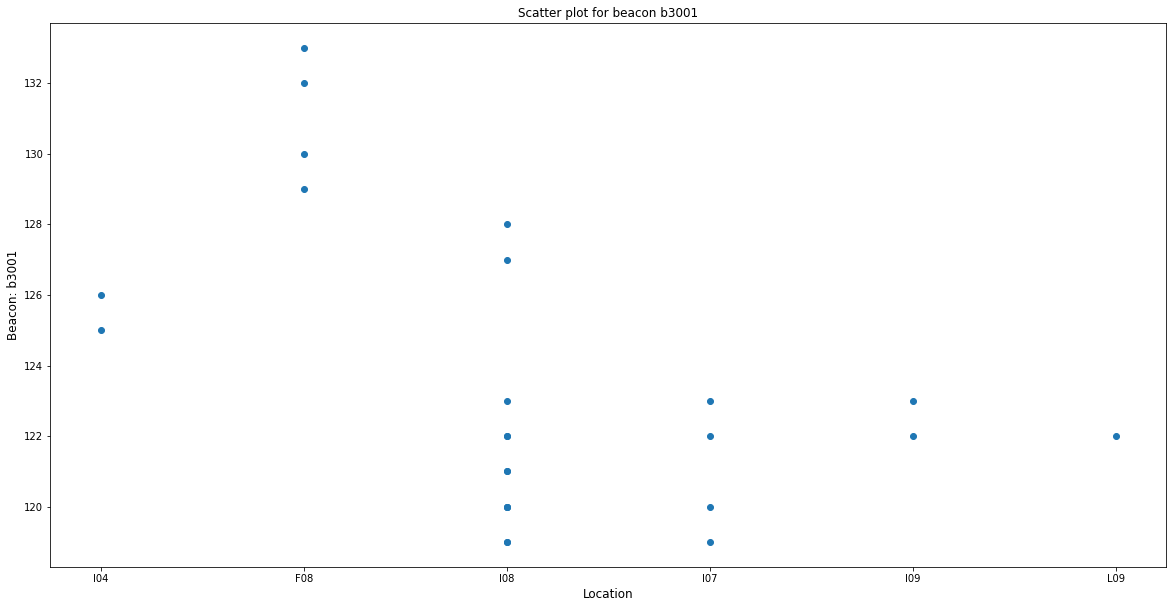

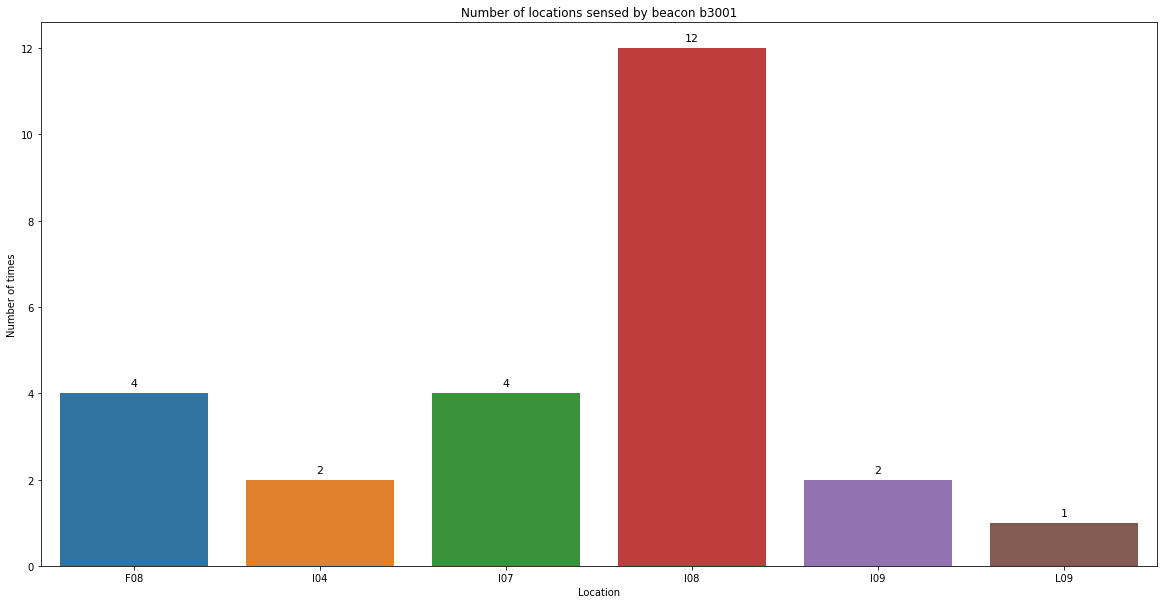

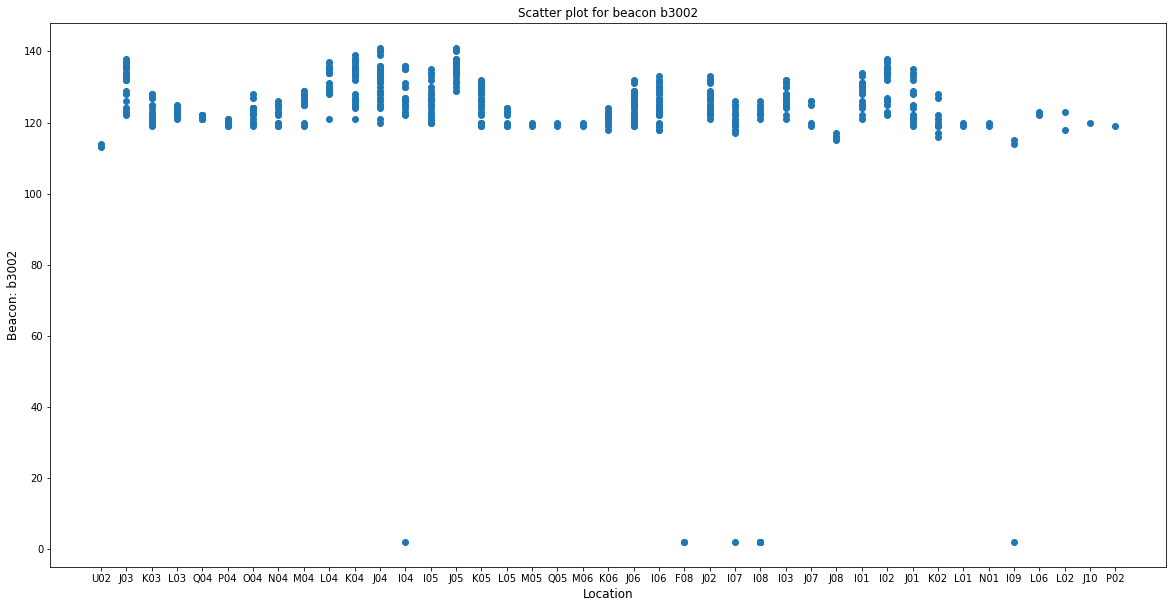

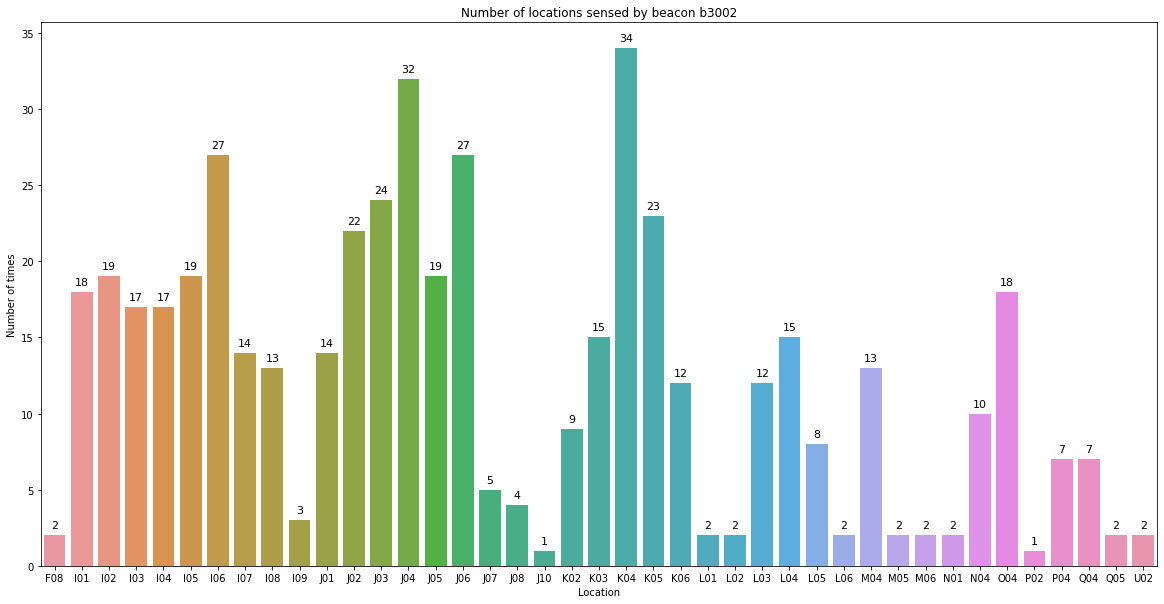

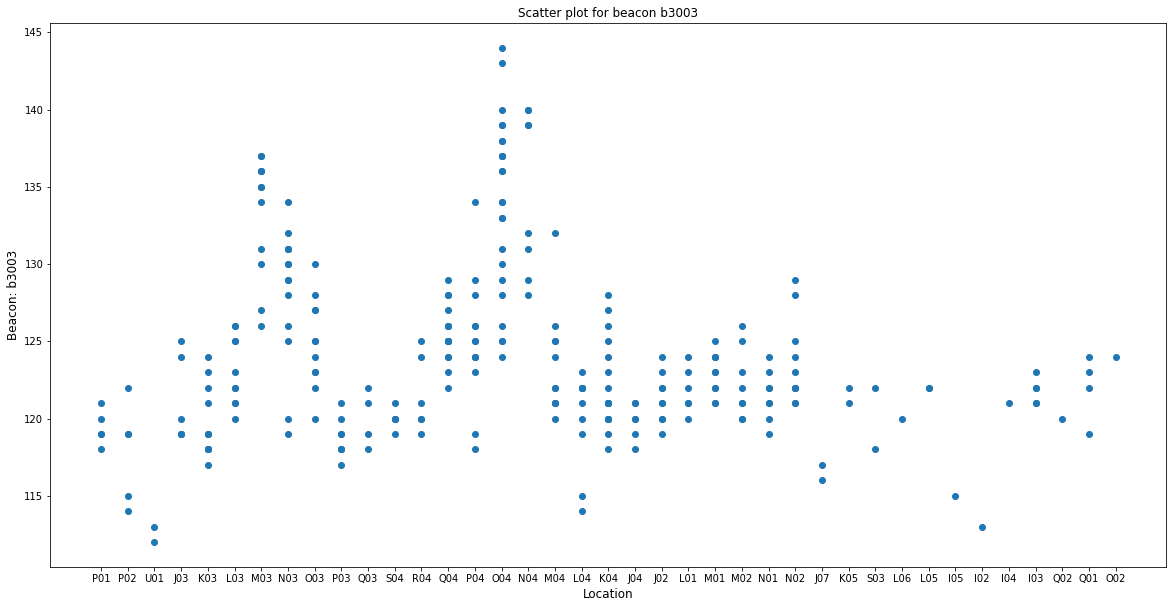

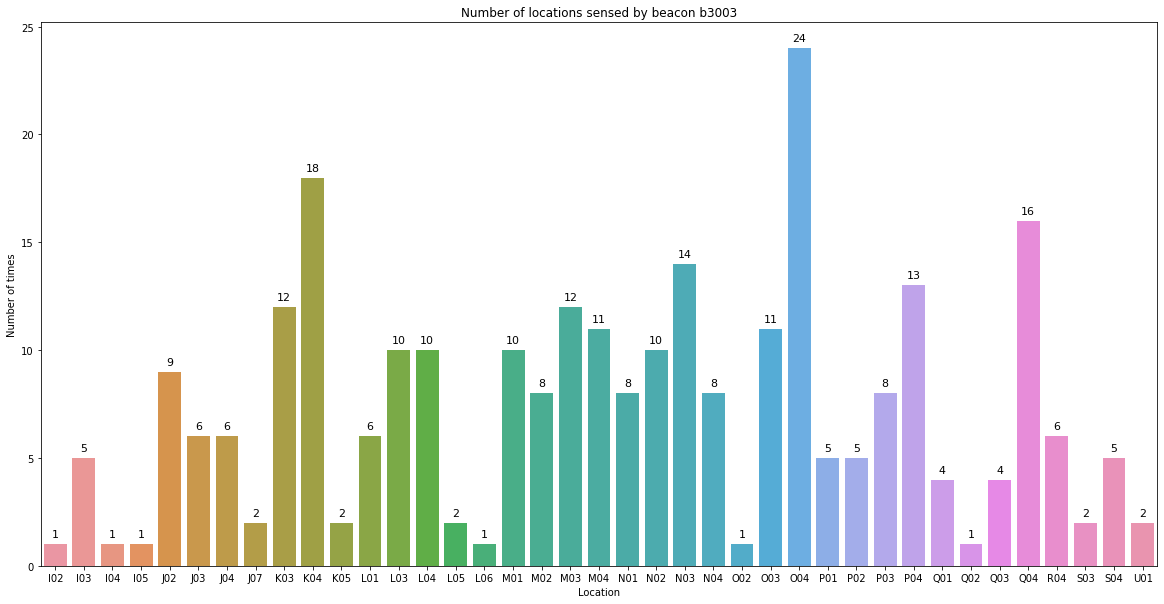

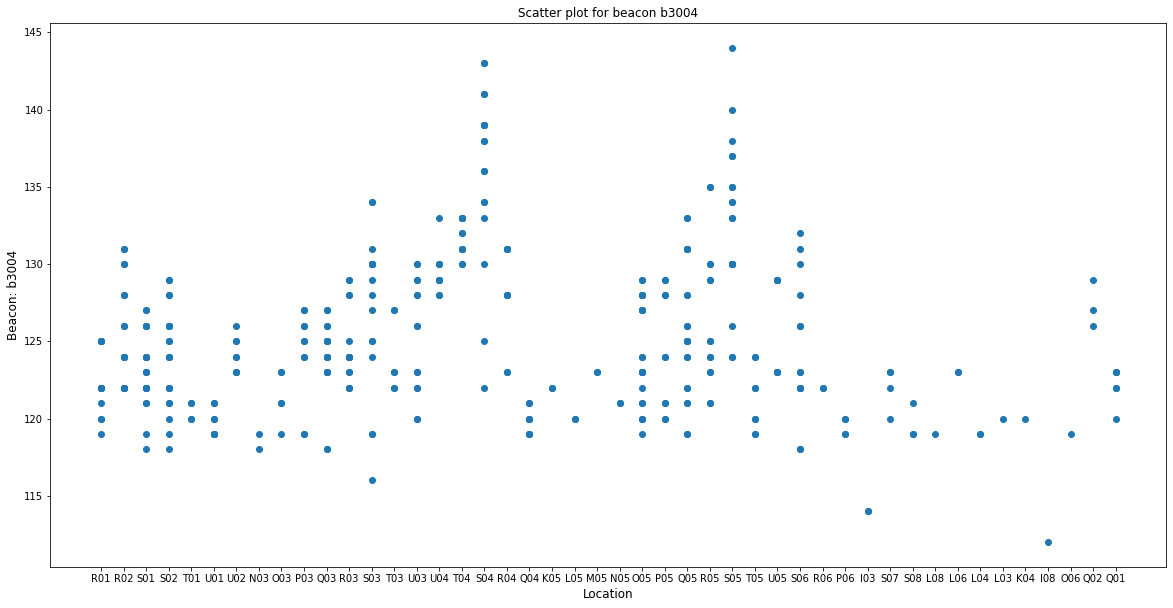

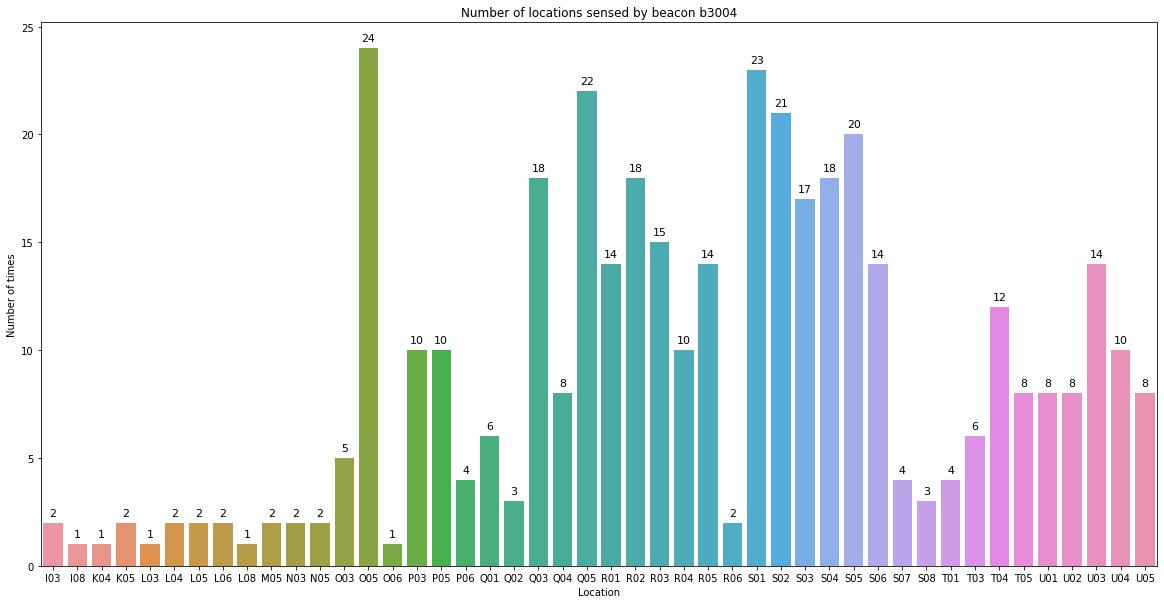

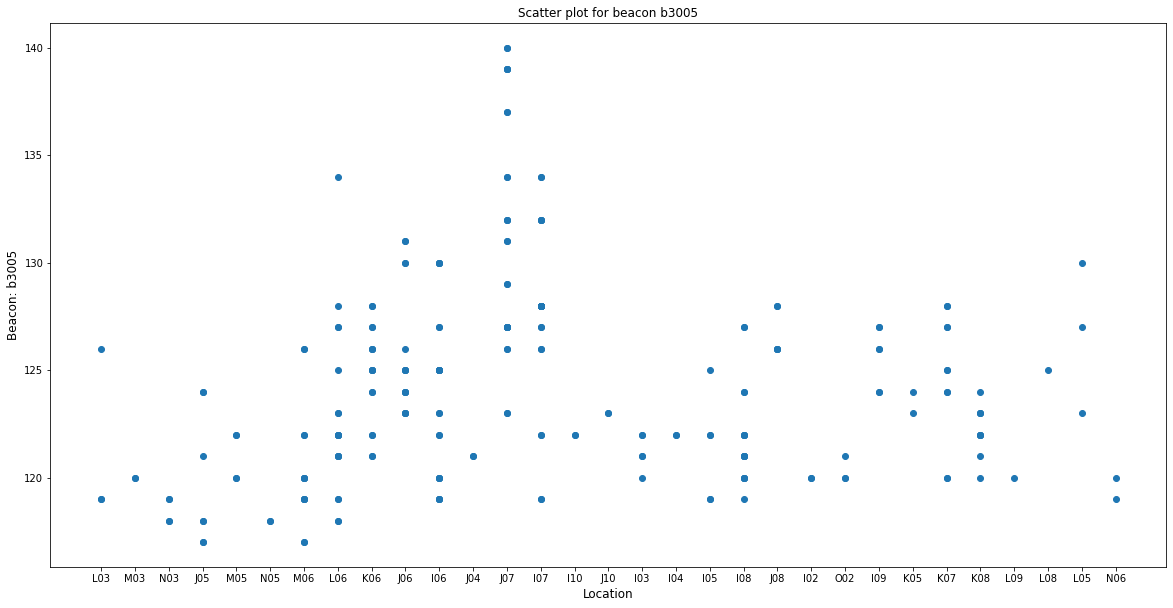

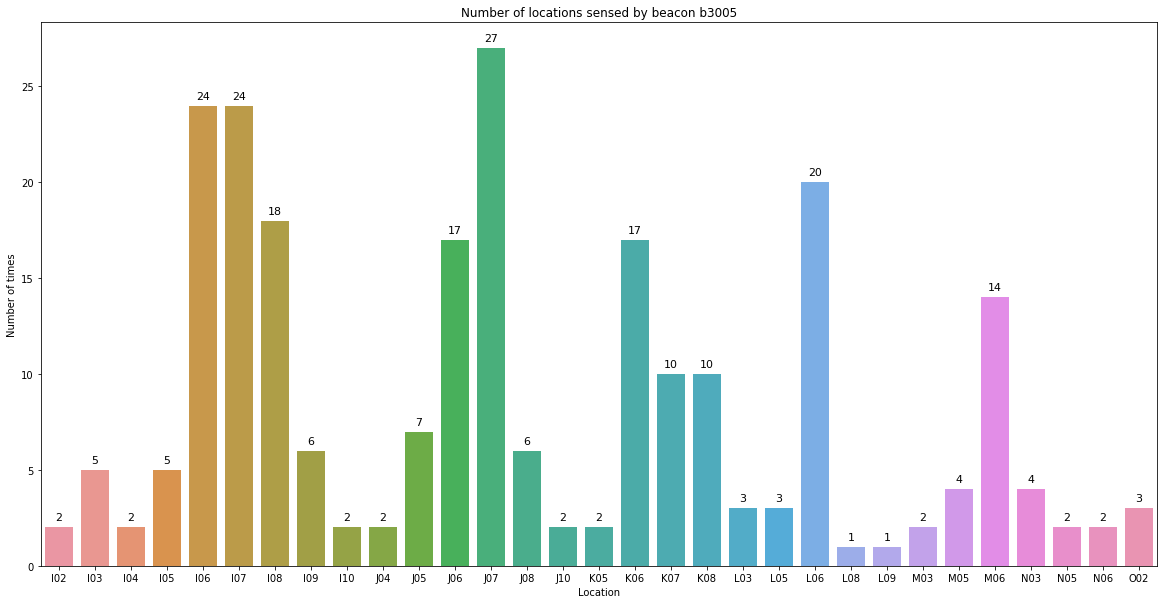

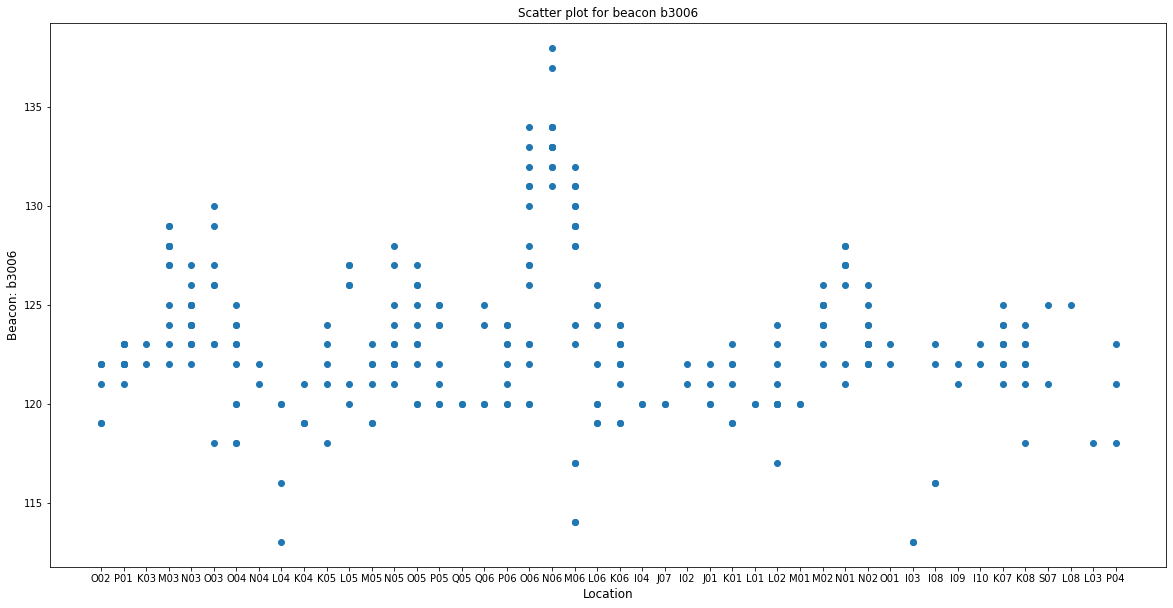

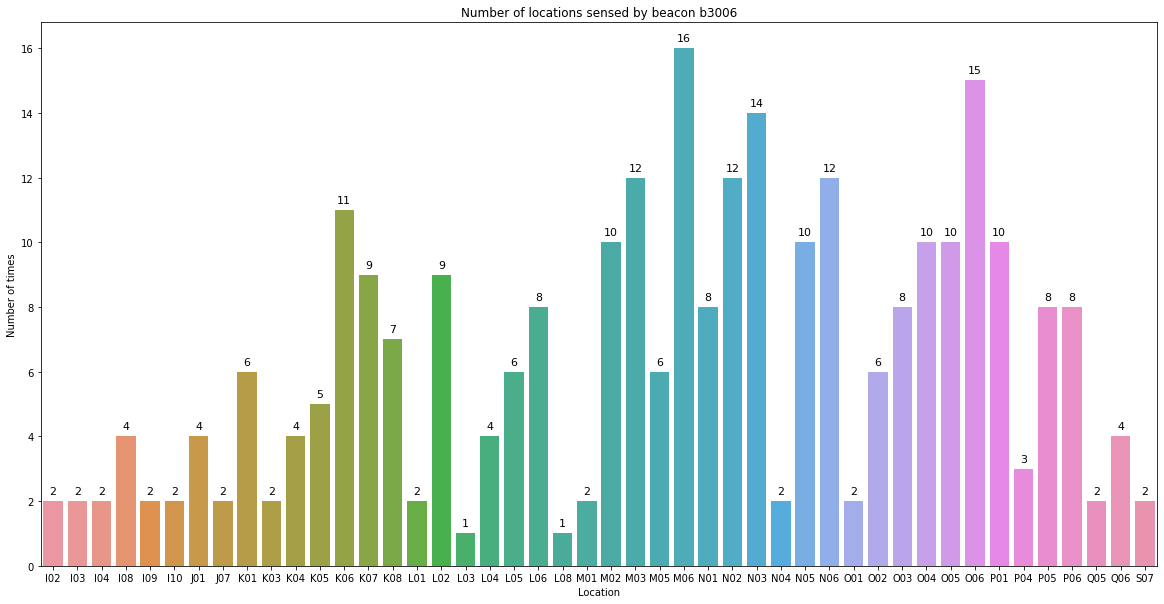

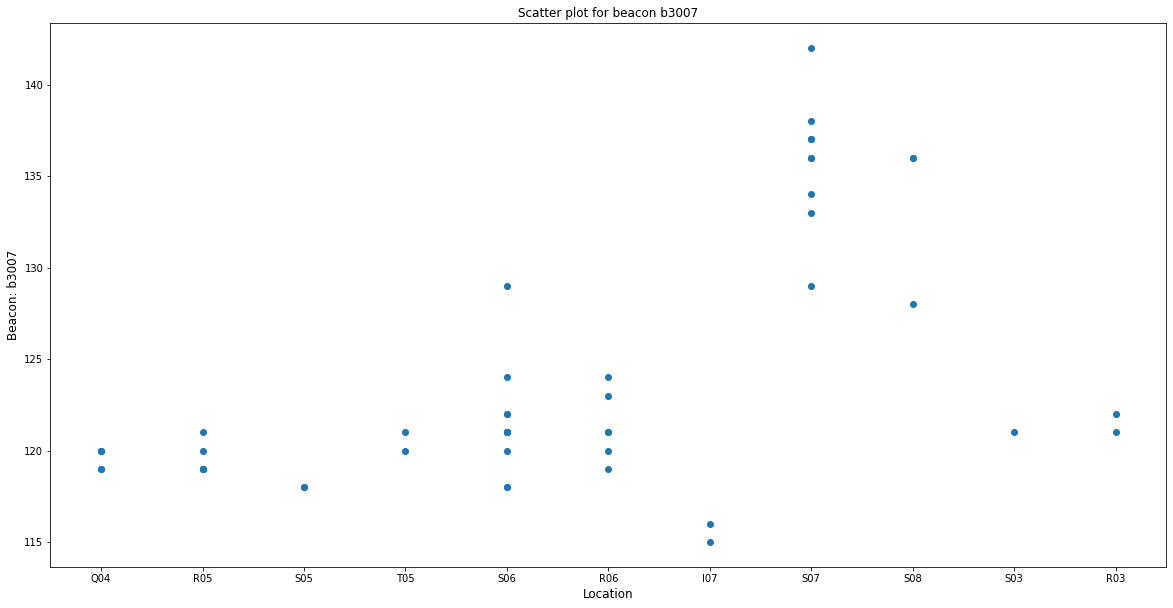

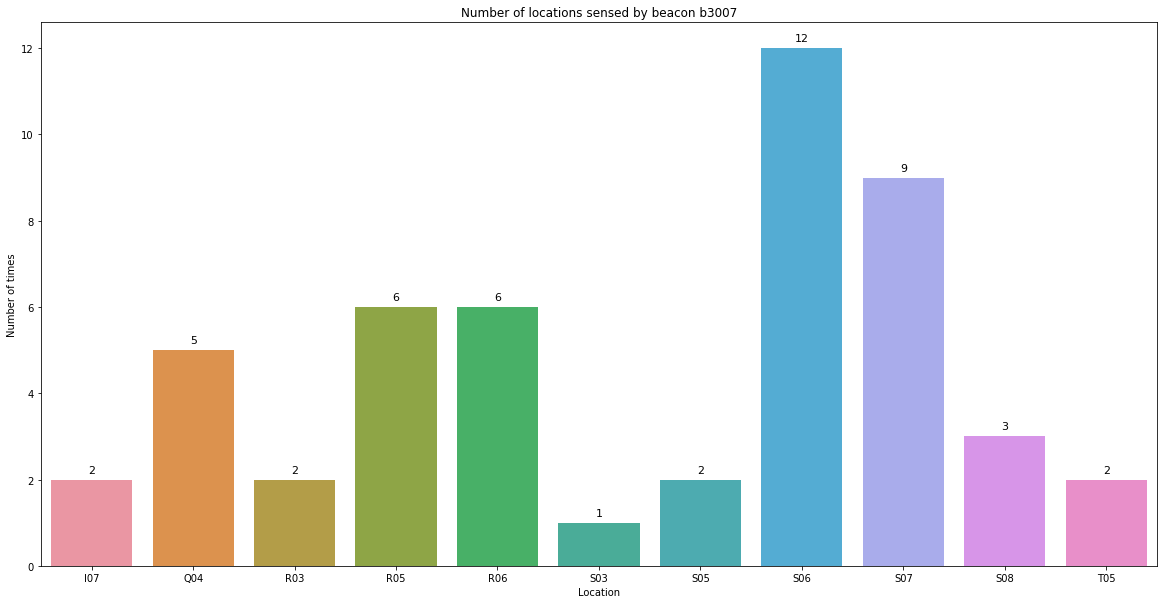

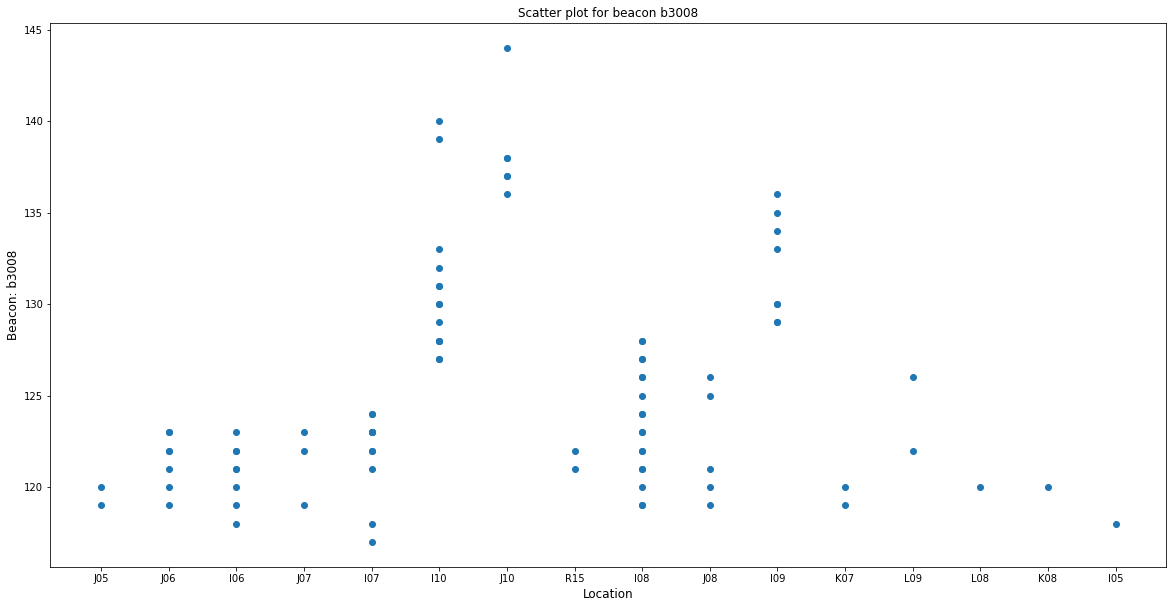

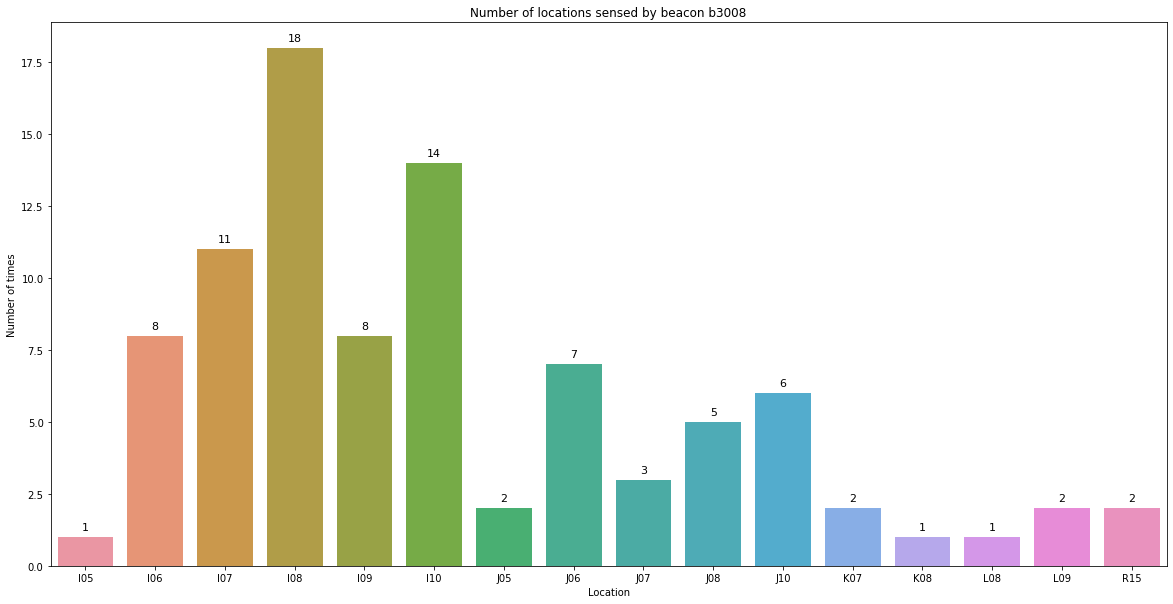

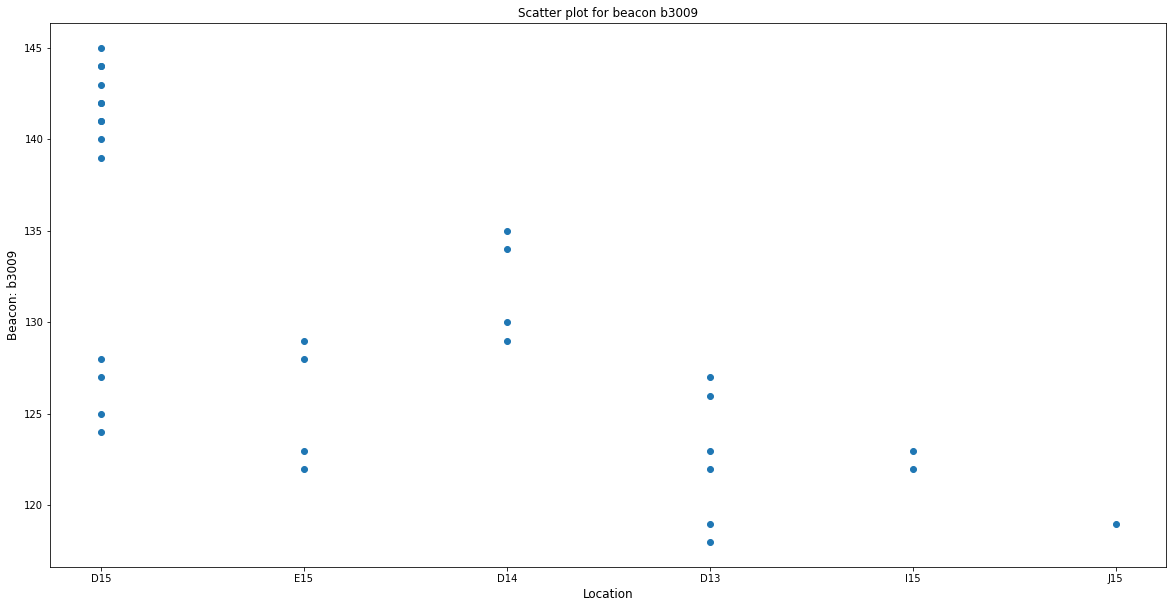

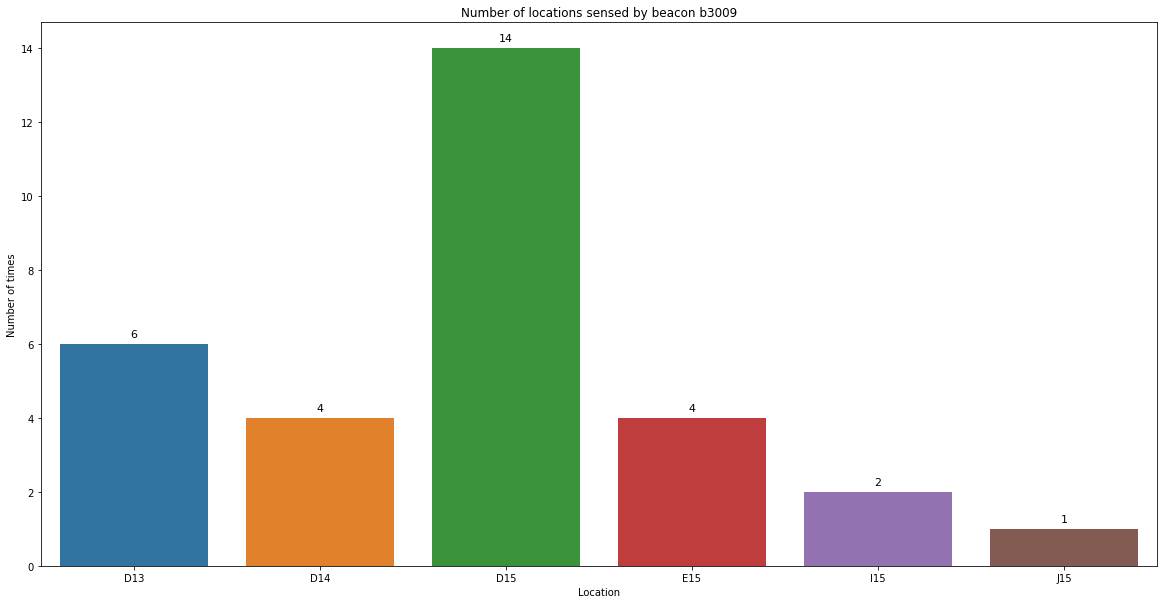

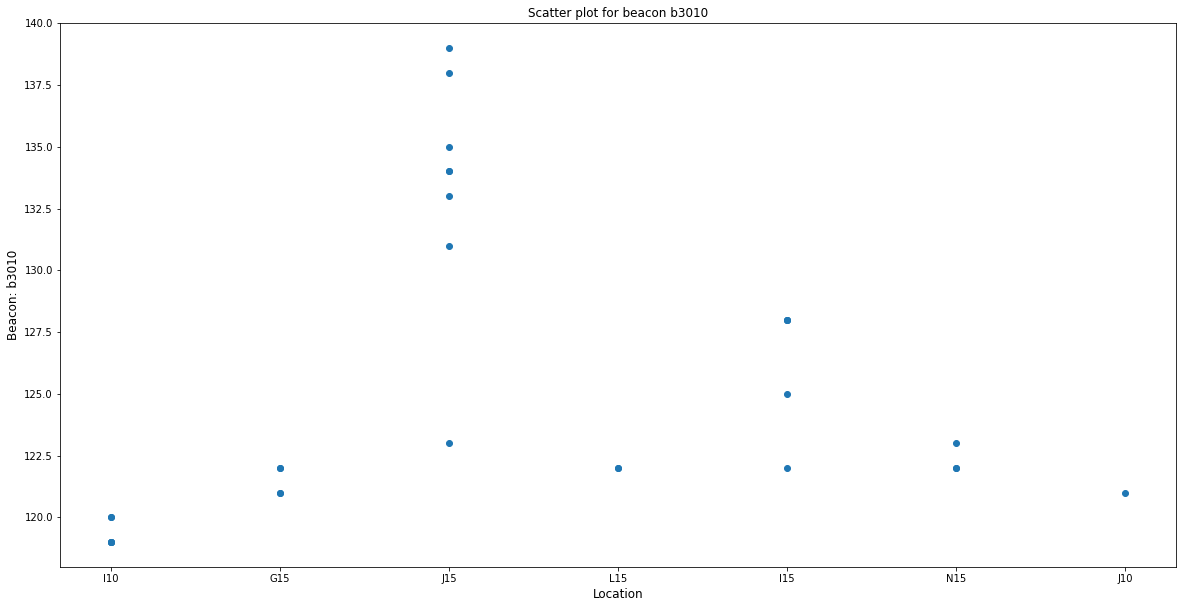

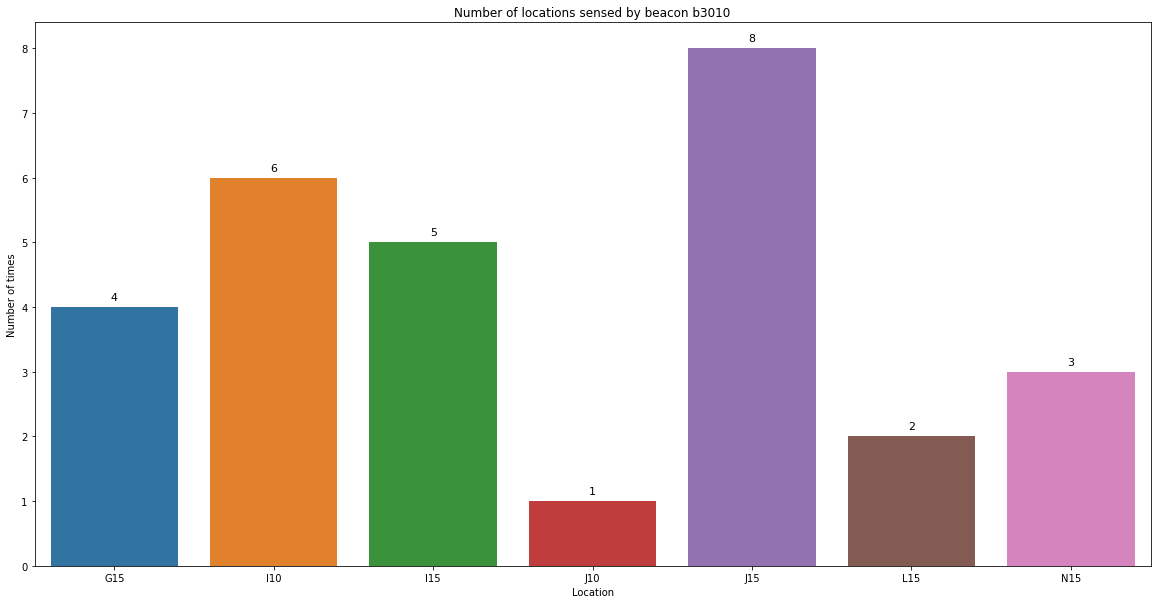

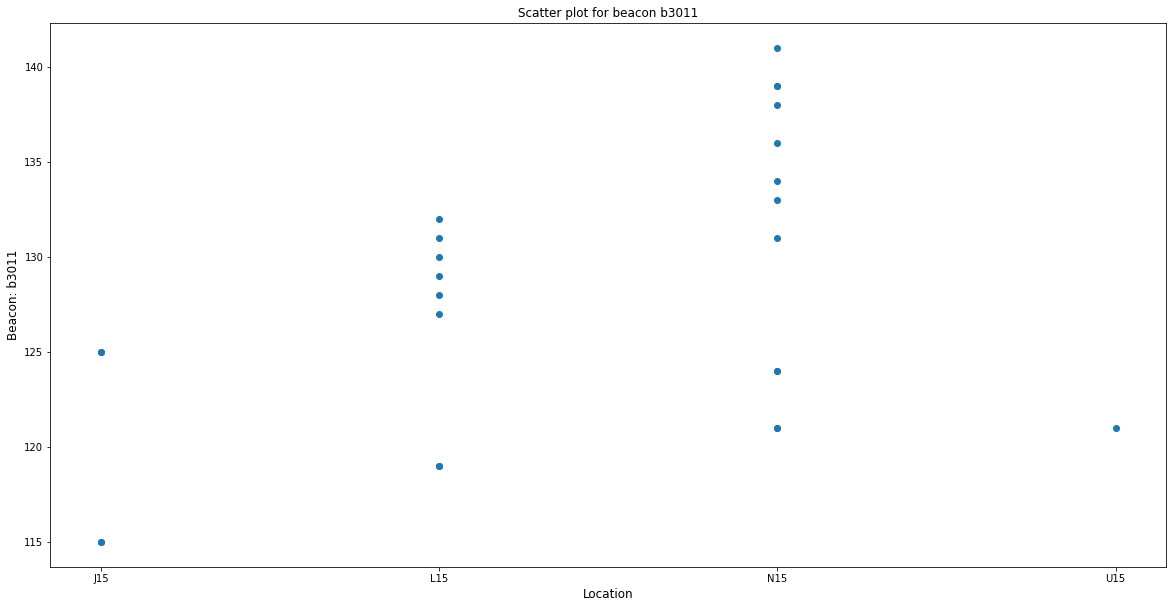

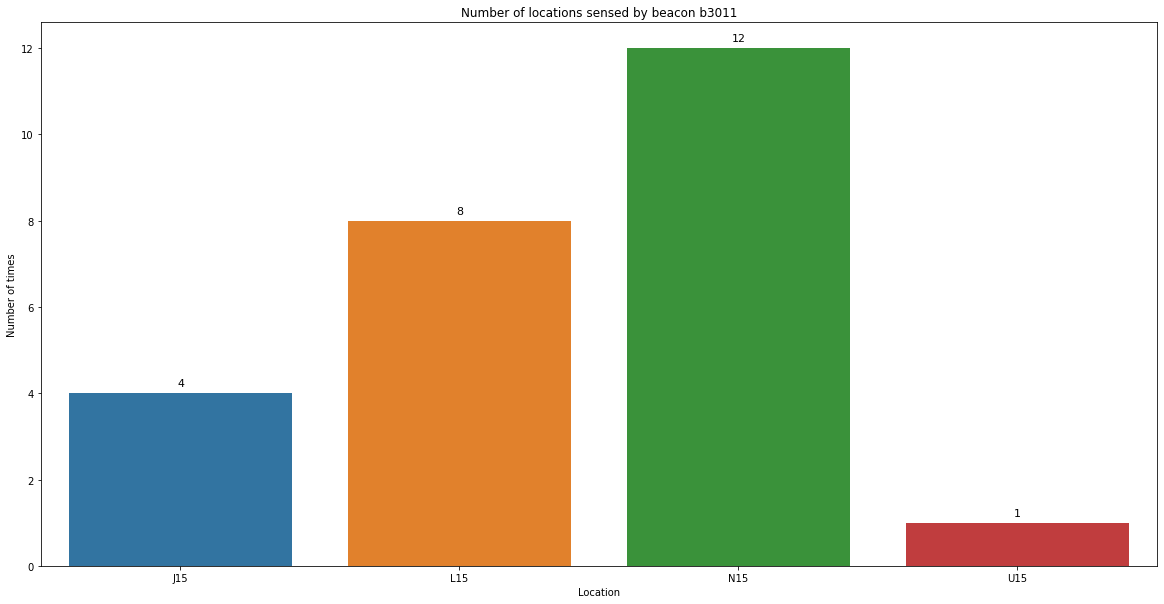

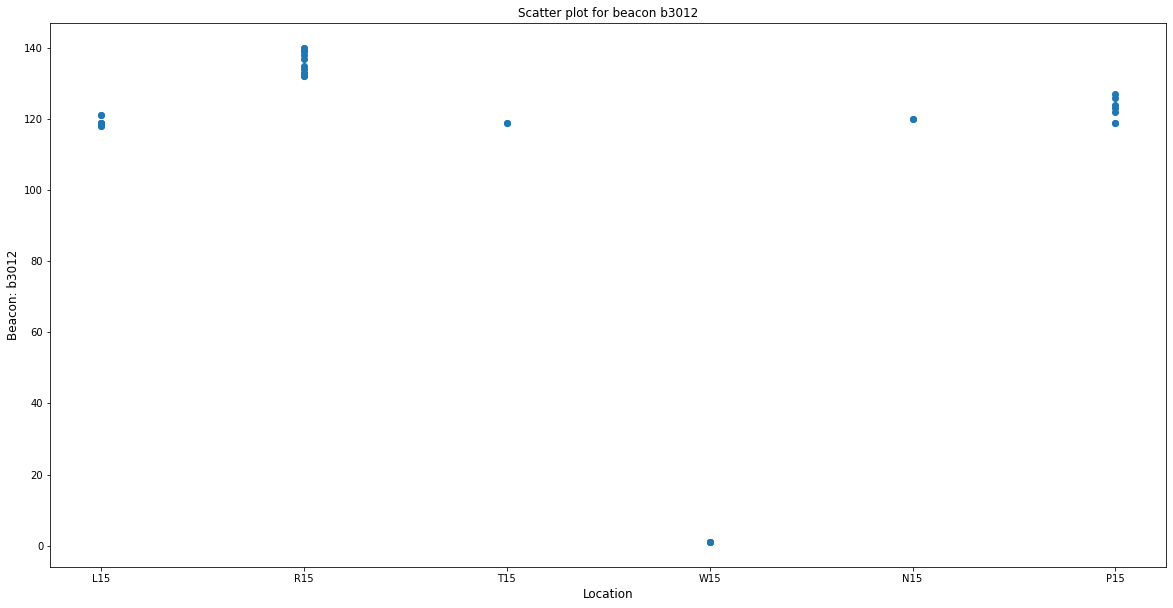

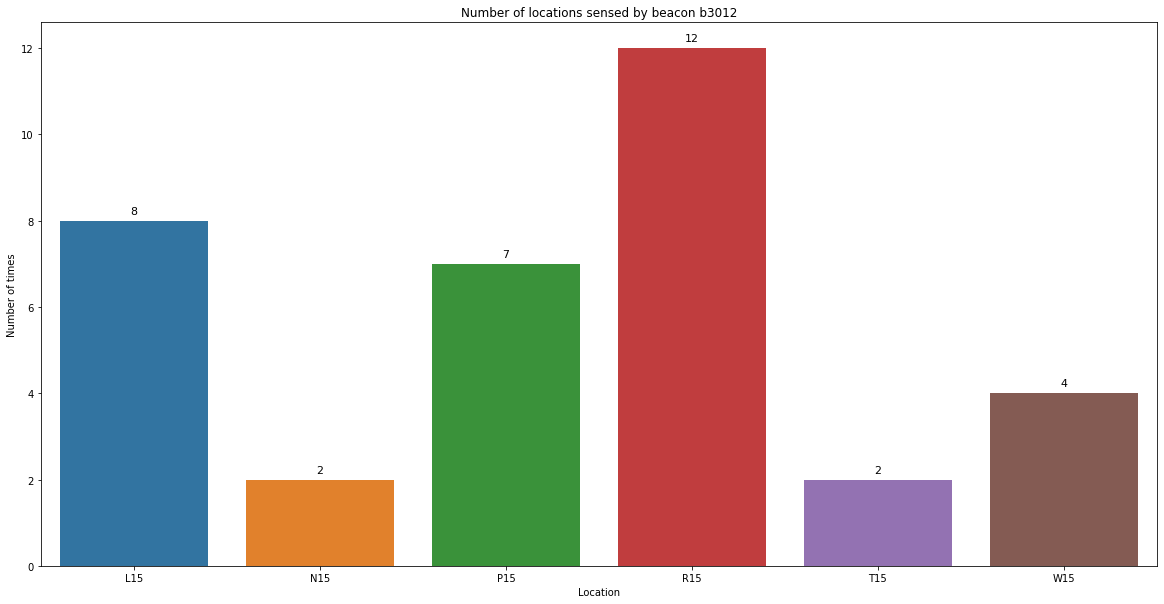

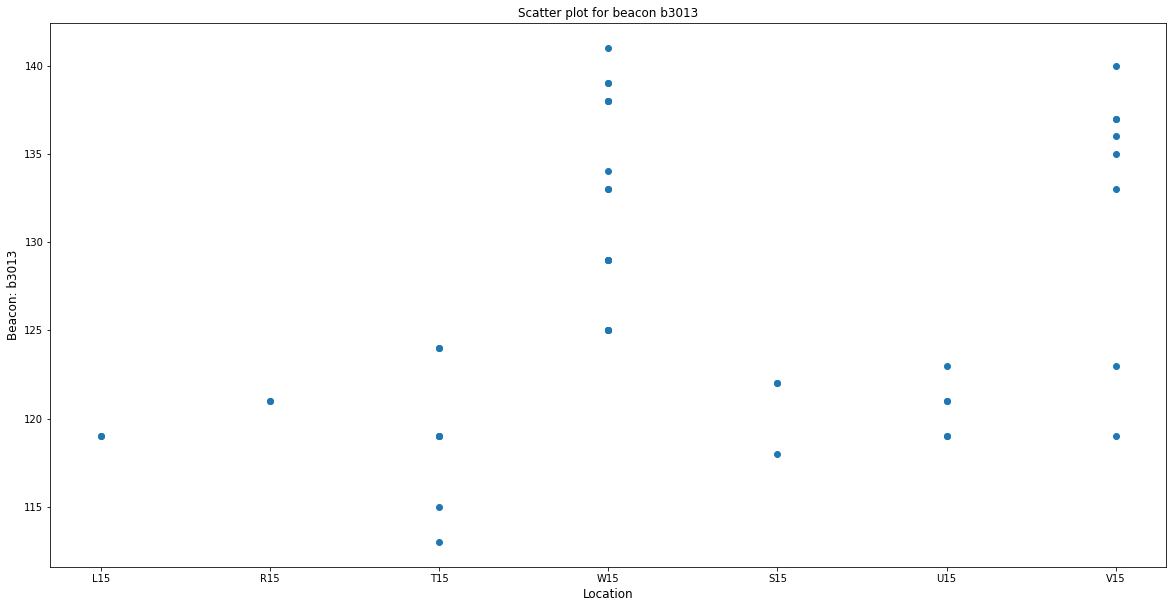

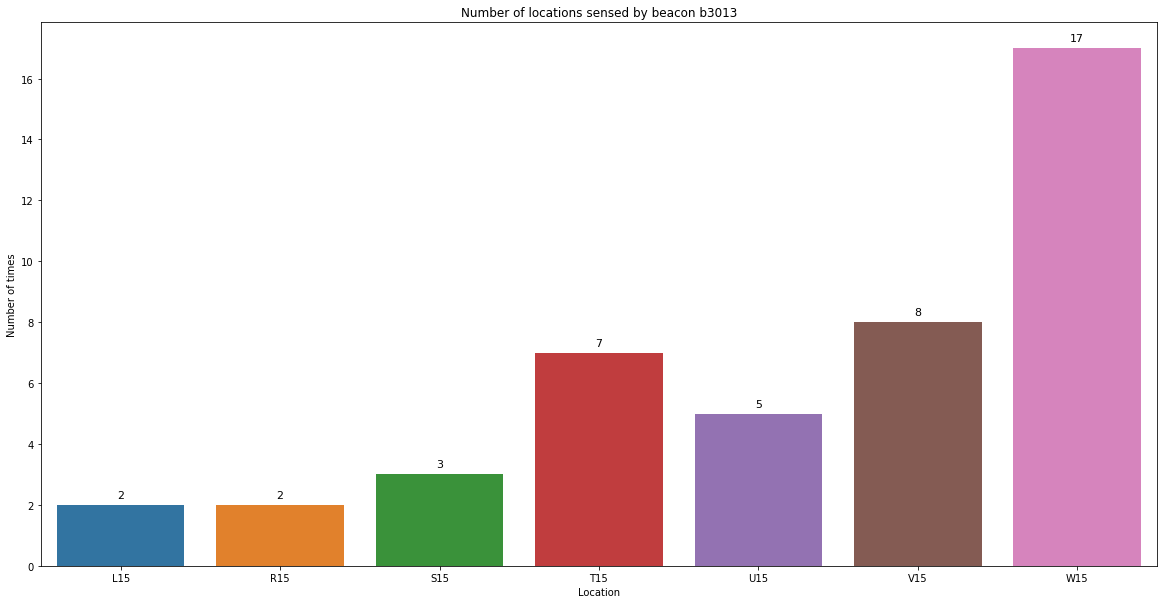

In [21]:
# Scatter Plot to see the RSSI value for each location per beacon
# Bar chart to count the number of locations picked up per beacon

columnNo = firstBeaconIndex

for i in range(firstBeaconIndex, lastBeaconIndex + 1):
    columnName = beacon_data.columns[columnNo]
    temp_beacon_data = beacon_data[["location", columnName]]
    for index, row in temp_beacon_data.iterrows():
        if(temp_beacon_data[columnName][index] == 0):
            temp_beacon_data = temp_beacon_data.drop(index)

    plt.figure(figsize=(20, 10))
    plt.title("Scatter plot for beacon " + columnName)
    plt.scatter(temp_beacon_data["location"], temp_beacon_data[columnName])
    plt.xlabel("Location", fontsize = 12)
    plt.ylabel("Beacon: " + columnName, fontsize = 12)
    
    fig = plt.subplots(figsize = (20, 10))
    new_mainData = temp_beacon_data.groupby(["location"]).agg({columnName : "count"}).reset_index().sort_values("location")
    plt.title("Number of locations sensed by beacon " + columnName)
    g = sns.barplot(x = new_mainData["location"], y = new_mainData[columnName])
    
    ax = g
    ax.set(xlabel = "Location", ylabel = "Number of times")

    for index in ax.patches:    
        ax.annotate(int(index.get_height()), (index.get_x() + index.get_width() / 2., index.get_height()), 
            ha = "center", va = "center", fontsize = 11, color = "black", xytext = (0, 10), textcoords = "offset points")
    
    plt.show()
    
    
    columnNo = columnNo + 1

In [22]:
# Analysis from Graphs

# Here we can see the RSSI values (adjusted to positive) for each beacon based on the location,
# and also the number of times a beacon has detected each location
# We can see popular beacons like beacon3002, beacon3003, beacon3005 and beacon3006.
# However, we must not forget that firstly, this dataset does not contain all locations. Therefore, not all beacons have the same popularity
# Also, a location can be sensed by multiple beacon as this may be due to things like:
#      the orientation of the phone
#      the surrounding movements that may interfere with the connect between the phone and the beacon
#      the movement of the user 
#      and many more...

# One thing I would say that is missing from my data exploration is the number of beacons sensed by each location in the data
# Since a location can be sensed by multiple beacons, knowing which beacons are sensed by each location can help in identifying the boundaries of each beacon.

In [23]:
columnNo = firstBeaconIndex

for i in range(firstBeaconIndex, lastBeaconIndex + 1):
    count = 0
    columnName = beacon_data.columns[columnNo]
    for index, row in beacon_data.iterrows():
        if(beacon_data[columnName][index] != 0):
            count = count + 1
    print("beacon", str(i), ": ", str(count))
    columnNo = columnNo + 1

beacon 1 :  25
beacon 2 :  497
beacon 3 :  280
beacon 4 :  402
beacon 5 :  247
beacon 6 :  287
beacon 7 :  50
beacon 8 :  91
beacon 9 :  31
beacon 10 :  29
beacon 11 :  25
beacon 12 :  35
beacon 13 :  44


In [24]:
# Data modelling

In [25]:
# Splitting into X features and Y output
dataX = beacon_data.drop(["location"], axis = 1) 
dataY = beacon_data[["location"]]

In [26]:
display(dataX)

0    b3001 b3002 b3003 b3004 b3005 b3006 b3007 b3008 b3009 b3010 b3011 b3012  \
1        0     0     0     0     0   122     0     0     0     0     0     0   
2        0     0     0     0     0   122     0     0     0     0     0     0   
3        0     0     0     0     0   123     0     0     0     0     0     0   
4        0     0     0     0     0   123     0     0     0     0     0     0   
5        0     0     0     0     0   123     0     0     0     0     0     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1416     0   124     0     0     0     0     0     0     0     0     0     0   
1417     0   128     0     0     0     0     0     0     0     0     0     0   
1418     0   133     0     0     0     0     0     0     0     0     0     0   
1419     0   121     0     0     0     0     0     0     0     0     0     0   
1420     0   125     0     0     0     0     0     0     0     0     0     0   

0    b3013  
1        0  
2        0  
3        0  
4        0  
5        0  
...    ...  
1416     0  
1417     0  
1418     0  
1419     0  
1420     0  

[1420 rows x 13 columns]

In [27]:
display(dataY)

0    location
1         O02
2         P01
3         P01
4         P01
5         P01
...       ...
1416      I01
1417      I01
1418      I01
1419      I01
1420      I01

[1420 rows x 1 columns]

In [28]:
beacon_data.columns[1:]

Index(['b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 'b3008',
       'b3009', 'b3010', 'b3011', 'b3012', 'b3013'],
      dtype='object', name=0)

In [29]:
# Split to seen and unseen data, unseen data is the testing data that will be used to determine accuracy/best hyperparameters for the model
# Seen data will be used to train the model
# 80% Training data, 20% Testing data
# random_state is used to fix a consistent training and testing dataset

TrainValidX, testX, TrainValidY, testY = train_test_split(np.array(dataX), np.array(dataY), test_size = 0.2, random_state = 10)

In [30]:
print("TrainValidX")
print(TrainValidX.shape)
print(TrainValidX)
print()

print("testX")
print(testX)
print(testX.shape)
print()

print("TrainValidY")
print(TrainValidY.shape)
print(TrainValidY)
print()

print("testY")
print(testY.shape)
print(testY)
print()

TrainValidX
(1136, 13)
[[0 123 138 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 125 121 ... 0 0 0]
 ...
 [0 122 0 ... 0 0 0]
 [0 119 124 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

testX
[[0 123 136 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 123]
 [0 0 0 ... 0 0 0]
 [0 122 0 ... 0 0 0]]
(284, 13)

TrainValidY
(1136, 1)
[['O04']
 ['K07']
 ['K04']
 ...
 ['J01']
 ['P04']
 ['U02']]

testY
(284, 1)
[['O04']
 ['S02']
 ['R05']
 ['D15']
 ['Q03']
 ['Q01']
 ['L02']
 ['K05']
 ['S05']
 ['D15']
 ['U03']
 ['P04']
 ['R05']
 ['Q03']
 ['I04']
 ['O05']
 ['J07']
 ['I06']
 ['O06']
 ['N05']
 ['W15']
 ['J02']
 ['N03']
 ['I07']
 ['S03']
 ['P04']
 ['P15']
 ['U01']
 ['M06']
 ['L06']
 ['J02']
 ['P02']
 ['N06']
 ['K01']
 ['L06']
 ['K05']
 ['I08']
 ['K02']
 ['J06']
 ['S01']
 ['Q05']
 ['J06']
 ['L05']
 ['R03']
 ['L05']
 ['N03']
 ['L09']
 ['K02']
 ['O04']
 ['M01']
 ['U02']
 ['I10']
 ['M05']
 ['Q04']
 ['L05']
 ['K06']
 ['R04']
 ['U03']
 ['Q05']
 ['L06']
 ['K03']
 ['S01']
 ['T04']
 ['I10']
 ['L03']
 ['N02']
 ['U0

In [31]:
# Now, we shall conduct feature selection. I use SelectKBest to do determine the best beacons to be used for feature selection
# Note: I enjoy and am more comfortable using SelectKBest instead of hill climbing for feature selection. Thats why I did not use hill climbing

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Beacon')

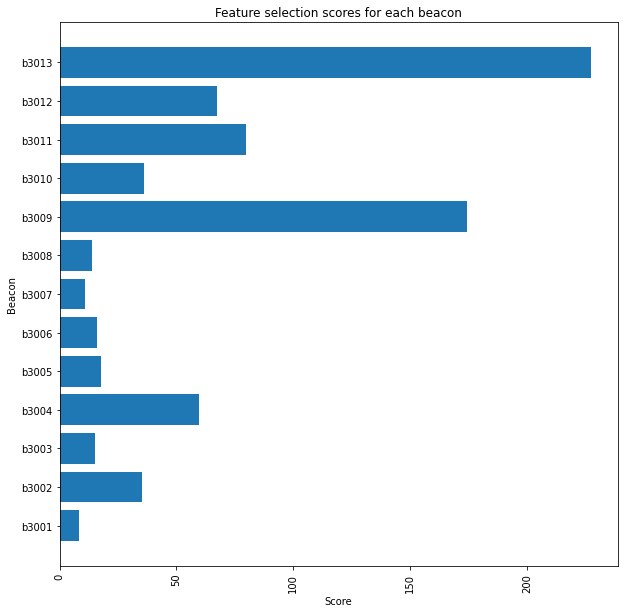

In [32]:
# Feature selection

att_names = beacon_data.columns[1:]
featureSelector = SelectKBest(score_func = f_classif, k = 6).fit(TrainValidX, TrainValidY)
plt.figure(figsize=(10, 10))
scores = featureSelector.scores_

plt.xticks(rotation ="vertical")
plt.barh(att_names, scores, )
plt.title("Feature selection scores for each beacon")
plt.xlabel("Score")
plt.ylabel("Beacon")

In [33]:
# Based on the above, we can see the columns that affect the model the most are beacon 13, 9, 11, 12 and 4, in descending order.
# However, is it right to do feature selection for this dataset? Lets do a test run to see how good it would be

In [34]:
# Original dataset (no columns removed)

In [35]:
clf = KNeighborsClassifier(5, weights = "distance")
fit = clf.fit(TrainValidX, TrainValidY)
prediction = fit.predict(testX)
cm = confusion_matrix(testY, prediction)
cr = classification_report(testY, prediction)
print(cr)

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         2
         I03       0.25      1.00      0.40         1
         I04       0.00      0.00      0.00         4
         I05       0.20      0.20      0.20         5
         I06       0.50      1.00      0.67         4
         I07       0.80      0.44      0.57         9
         I08       0.50      0.80      0.62         5
         I09       1.00      1.00      1.00         3
         I10       1.00      1.00      1.00         5
         I15       1.00      1.00      1.00         2
         J01       0.00    

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
# Feature selection dataset 
# # We will take features that are above 50 score (Only beacons 4, 9, 11, 12 and 13 are the columns)

In [37]:
featureSelection_dataX = dataX.drop(["b3001", "b3002", "b3003", "b3005", "b3006", "b3007", "b3008", "b3010"], axis = 1)
display(featureSelection_dataX)

0    b3004 b3009 b3011 b3012 b3013
1        0     0     0     0     0
2        0     0     0     0     0
3        0     0     0     0     0
4        0     0     0     0     0
5        0     0     0     0     0
...    ...   ...   ...   ...   ...
1416     0     0     0     0     0
1417     0     0     0     0     0
1418     0     0     0     0     0
1419     0     0     0     0     0
1420     0     0     0     0     0

[1420 rows x 5 columns]

In [38]:
featureSelection_TrainValidX, featureSelection_testX, featureSelection_TrainValidY, featureSelection_testY = train_test_split(np.array(featureSelection_dataX), np.array(dataY), test_size = 0.2, random_state = 10)

In [39]:
clf = KNeighborsClassifier(5, weights = "distance")
fit = clf.fit(featureSelection_TrainValidX, featureSelection_TrainValidY)
prediction = fit.predict(featureSelection_testX)
cm = confusion_matrix(featureSelection_testY, prediction)
cr = classification_report(featureSelection_testY, prediction)
print(cr)

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         1
         I01       0.02      1.00      0.03         3
         I02       0.00      0.00      0.00         2
         I03       1.00      1.00      1.00         1
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         5
         I06       0.00      0.00      0.00         4
         I07       0.00      0.00      0.00         9
         I08       0.00      0.00      0.00         5
         I09       0.00      0.00      0.00         3
         I10       0.00      0.00      0.00         5
         I15       0.00      0.00      0.00         2
         J01       0.00    

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
# The accuracy is so bad, compared to when all 13 beacon columns are used.
# Now lets try a different numbers of features selected.
# Based on the graph visually, lets pick all features that are significant.
# The beacons are 2, 4, 9, 10, 11, 12, 13

In [41]:
featureSelection2_dataX = dataX.drop(["b3001", "b3003", "b3005", "b3006", "b3007", "b3008"], axis = 1)
display(featureSelection2_dataX)

0    b3002 b3004 b3009 b3010 b3011 b3012 b3013
1        0     0     0     0     0     0     0
2        0     0     0     0     0     0     0
3        0     0     0     0     0     0     0
4        0     0     0     0     0     0     0
5        0     0     0     0     0     0     0
...    ...   ...   ...   ...   ...   ...   ...
1416   124     0     0     0     0     0     0
1417   128     0     0     0     0     0     0
1418   133     0     0     0     0     0     0
1419   121     0     0     0     0     0     0
1420   125     0     0     0     0     0     0

[1420 rows x 7 columns]

In [42]:
featureSelection2_TrainValidX, featureSelection2_testX, featureSelection2_TrainValidY, featureSelection2_testY = train_test_split(np.array(featureSelection2_dataX), np.array(dataY), test_size = 0.2, random_state = 10)

In [43]:
clf = KNeighborsClassifier(5, weights = "distance")
fit = clf.fit(featureSelection2_TrainValidX, featureSelection2_TrainValidY)
prediction = fit.predict(featureSelection2_testX)
cm = confusion_matrix(featureSelection2_testY, prediction)
cr = classification_report(featureSelection2_testY, prediction)
print(cr)

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         F08       0.00      0.00      0.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         2
         I03       0.25      1.00      0.40         1
         I04       0.20      0.25      0.22         4
         I05       0.00      0.00      0.00         5
         I06       0.00      0.00      0.00         4
         I07       0.00      0.00      0.00         9
         I08       0.67      0.40      0.50         5
         I09       0.00      0.00      0.00         3
         I10       1.00      0.60      0.75         5
         I15       1.00      1.00      1.00         2
         J01       0.00    

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [44]:
# The accuracy is still bad, however, it is better than the previous one
# To me, the reason could be because when the dataset is bad, as there is not enough data. Therefore, predicting has been an issue.

In [45]:
# Therefore, based on feature selection, all beacons will be in the feature selection

In [46]:
# Creating a K Nearest Neighbor model

In [47]:
# I will do K Fold cross validation to create a better model, as K Fold cross validation takes in more data into validating a better model

In [48]:
# I am splitting the TrainValid dataset into 4 as 1136 / 4 = 284, with no decimals
numberOfSplits = 4
kf = KFold(n_splits = numberOfSplits, random_state = 10)

In [49]:
# Change this value for more tests of n_neighbours
n_neighbors = 10

# variable to store best classifierValue, weightsIndex and pValue
best_classifierValue = -1
best_weightsValue = -1
best_pValue = -1

currentlyBest_f1score = -1

In [50]:
# First, we have to determine which metric will have precedence over all metrices.
# I would say, f1 score, since it takes recall and precision scores into account

In [51]:
classifierValue = 1
weightsValue = ["uniform", "distance"]

while(classifierValue <= n_neighbors):
    weightsIndex = 0
    while(weightsIndex < 2):
        pValue = 1
        while(pValue <= 2):
            currentModel_f1score = 0
            
            for train_index, valid_index in kf.split(TrainValidX):
                print("Train ", train_index, "Valid ", valid_index)
                trainX, validX = TrainValidX[train_index], TrainValidX[valid_index]
                trainY, validY = TrainValidY[train_index], TrainValidY[valid_index]

                clf = KNeighborsClassifier(classifierValue, weights = weightsValue[weightsIndex], p = pValue)
                fit = clf.fit(trainX, trainY)
                predictedModel = fit.predict(validX)
#                 cm = confusion_matrix(validY, predictedModel)
#                 cr = classification_report(validY, predictedModel)
                f1score = f1_score(validY, predictedModel, average = "micro")
                currentModel_f1score = currentModel_f1score + f1score 

                # Displaying confusion matrix and report
#                 print("Validation Index:", validationIndex)
#                 print("Classifier Value: " + str(classifierValue))
#                 print("Weights: " + weightsValue[weightsIndex]) 
#                 print("p: " + str(pValue))
#                 print()
#                 print(cm)
#                 print(cr)
#                 print()
                print(currentModel_f1score)
            
            # divide the total f1-score by 4 since there are 4 folds
            currentModel_f1score = currentModel_f1score / 4
            
            if(currentlyBest_f1score < currentModel_f1score):
                best_classifierValue = classifierValue
                best_weightsValue = weightsIndex
                best_pValue = pValue
                currentlyBest_f1score = currentModel_f1score

            pValue = pValue + 1
        weightsIndex = weightsIndex + 1
    classifierValue = classifierValue + 1

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

Train  [ 284  285  286  287  288  289  290  291  292  293  294  295  296  297
  298  299  300  301  302  303  304  305  306  307  308  309  310  311
  312  313  314  315  316  317  318  319  320  321  322  323  324  325
  326  327  328  329  330  331  332  333  334  335  336  337  338  339
  340  341  342  343  344  345  346  347  348  349  350  351  352  353
  354  355  356  357  358  359  360  361  362  363  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  390  391  392  393  394  395
  396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444  445  446  447  448  449  450  451
  452  453  454  455  456  457  458  459  460  461  462  463  464  465
  466  467  468  469  470  471  472  473  474  475  476  477  478  479

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c


Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  19

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

1.1971830985915493
Train  [ 284  285  286  287  288  289  290  291  292  293  294  295  296  297
  298  299  300  301  302  303  304  305  306  307  308  309  310  311
  312  313  314  315  316  317  318  319  320  321  322  323  324  325
  326  327  328  329  330  331  332  333  334  335  336  337  338  339
  340  341  342  343  344  345  346  347  348  349  350  351  352  353
  354  355  356  357  358  359  360  361  362  363  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  390  391  392  393  394  395
  396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444  445  446  447  448  449  450  451
  452  453  454  455  456  457  458  459  460  461  462  463  464  465
  466  467  468  469  470  471  472  473  474  475 

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

0.8908450704225352
Train  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

0.9894366197183099
Train  [ 284  285  286  287  288  289  290  291  292  293  294  295  296  297
  298  299  300  301  302  303  304  305  306  307  308  309  310  311
  312  313  314  315  316  317  318  319  320  321  322  323  324  325
  326  327  328  329  330  331  332  333  334  335  336  337  338  339
  340  341  342  343  344  345  346  347  348  349  350  351  352  353
  354  355  356  357  358  359  360  361  362  363  364  365  366  367
  368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  389  390  391  392  393  394  395
  396  397  398  399  400  401  402  403  404  405  406  407  408  409
  410  411  412  413  414  415  416  417  418  419  420  421  422  423
  424  425  426  427  428  429  430  431  432  433  434  435  436  437
  438  439  440  441  442  443  444  445  446  447  448  449  450  451
  452  453  454  455  456  457  458  459  460  461  462  463  464  465
  466  467  468  469  470  471  472  473  474  475 

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

0.2605633802816901
Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191 

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c

Train  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c


Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  19

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c


Train  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  19

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A c


Train  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 24

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [52]:
# Checking for best hyperparameters based on f1-score
print("Best Classifier Value: " + str(best_classifierValue))
print("Best Weights: " + weightsValue[best_weightsValue]) 
print("Best p: " + str(best_pValue))
print("F1-score: " + str(currentlyBest_f1score))

Best Classifier Value: 2
Best Weights: distance
Best p: 2
F1-score: 0.30281690140845074


In [53]:
# Therefore, the best K Nearest Neighbour model is when n_neighbor = 2, weights = "distance" and p = 2, with a F1-score of about 0.30, based on validation data

In [54]:
# Generating the K Nearest Neighbor model, with the best hyperparameters

In [55]:
# 75% Training data, 25% Validating data (from the 80% original dataset)
finalTrainX, finalValidX, finalTrainY, finalValidY = train_test_split(TrainValidX, TrainValidY, test_size = 0.25, random_state = 10)

In [56]:
main_knnModel = KNeighborsClassifier(best_classifierValue, weights = weightsValue[best_weightsValue], p = best_pValue)
main_knnModel = main_knnModel.fit(finalTrainX, finalTrainY)
predictValid = main_knnModel.predict(finalValidX)
cm = confusion_matrix(finalValidY, predictValid)
cr = classification_report(finalValidY, predictValid)
f1score = f1_score(finalValidY, predictValid, average = "micro")

# Displaying confusion matrix, report and f1-score
print(cm)
print(cr)
print("F1-score: " + str(f1score))
print()

[[2 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.67      1.00      0.80         2
         D14       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         1
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.33      0.20      0.25         5
         I03       0.25      0.50      0.33         2
         I04       0.00      0.00      0.00         2
         I05       0.00      0.00      0.00         2
         I06       0.83      0.83      0.83         6
         I07       0.40      0.67      0.50         6
         I08       1.00      0.57      0.73         7
         I09       0.00      0.00      0.00         3
         I10       0.00      0.00      0.00         1
         I15       0.00      0.00      0.00         0
         J01   

C:\Users\Darren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
# Using main KNN model to predict unseen/testing data

In [58]:
predictTest = main_knnModel.predict(testX)
cm = confusion_matrix(testY, predictTest)
cr = classification_report(testY, predictTest)
f1score = f1_score(testY, predictTest, average = "micro")

# Displaying confusion matrix, report and f1-score
print(cm)
print(cr)
print("F1-score: " + str(f1score))
print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         F08       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         2
         I03       0.33      1.00      0.50         1
         I04       0.20      0.25      0.22         4
         I05       0.10      0.20      0.13         5
         I06       1.00      0.75      0.86         4
         I07       0.57      0.44      0.50         9
         I08       0.67      0.80      0.73         5
         I09       1.00      0.67      0.80         3
         I10   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [59]:
# Decision Tree

In [60]:
# We have to create the class labels for the decision tree, and it would be the different locations

In [61]:
location_labels = []

for index, row in beacon_data.iterrows():
    label = beacon_data["location"][index]
    size = len(location_labels)
    if size > 0:
        count = 0
        for i in range(size):
            if(location_labels[i] == label):
                count = count + 1
        if(count == 0):
            location_labels.append(label)
    else:
        location_labels.append(label)
print(location_labels)
print(len(location_labels))

['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02', 'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03', 'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04', 'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05', 'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05', 'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06', 'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07', 'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15', 'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02', 'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14', 'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15', 'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01']
105


In [62]:
beacon_data

0    location b3001 b3002 b3003 b3004 b3005 b3006 b3007 b3008 b3009 b3010  \
1         O02     0     0     0     0     0   122     0     0     0     0   
2         P01     0     0     0     0     0   122     0     0     0     0   
3         P01     0     0     0     0     0   123     0     0     0     0   
4         P01     0     0     0     0     0   123     0     0     0     0   
5         P01     0     0     0     0     0   123     0     0     0     0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1416      I01     0   124     0     0     0     0     0     0     0     0   
1417      I01     0   128     0     0     0     0     0     0     0     0   
1418      I01     0   133     0     0     0     0     0     0     0     0   
1419      I01     0   121     0     0     0     0     0     0     0     0   
1420      I01     0   125     0     0     0     0     0     0     0     0   

0    b3011 b3012 b3013  
1        0     0     0  
2        0     0     0  
3        0     0     0  
4        0     0     0  
5        0     0     0  
...    ...   ...   ...  
1416     0     0     0  
1417     0     0     0  
1418     0     0     0  
1419     0     0     0  
1420     0     0     0  

[1420 rows x 14 columns]

In [63]:
# Create a decision tree just to see the metric scores and depth (no cross validation and change in hyperparameters)

In [64]:
clf = tree.DecisionTreeClassifier()
fit = clf.fit(trainX, trainY)
predict = fit.predict(validX)

cm = confusion_matrix(validY, predict)
cr = classification_report(validY, predict)
f1score = f1_score(validY, predict, average = "micro")

# Displaying confusion matrix, report and f1-score
print(cm)
print(cr)
print("F1-score: " + str(f1score))
print("Depth:", fit.tree_.max_depth)

[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.25      0.40         4
         D14       0.00      0.00      0.00         1
         D15       0.50      1.00      0.67         1
         E15       0.00      0.00      0.00         0
         F08       1.00      0.50      0.67         2
         G15       1.00      1.00      1.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.14      0.50      0.22         4
         I04       0.25      0.33      0.29         3
         I05       0.00      0.00      0.00         5
         I06       0.14      0.12      0.13         8
         I07       0.14      0.33      0.20         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


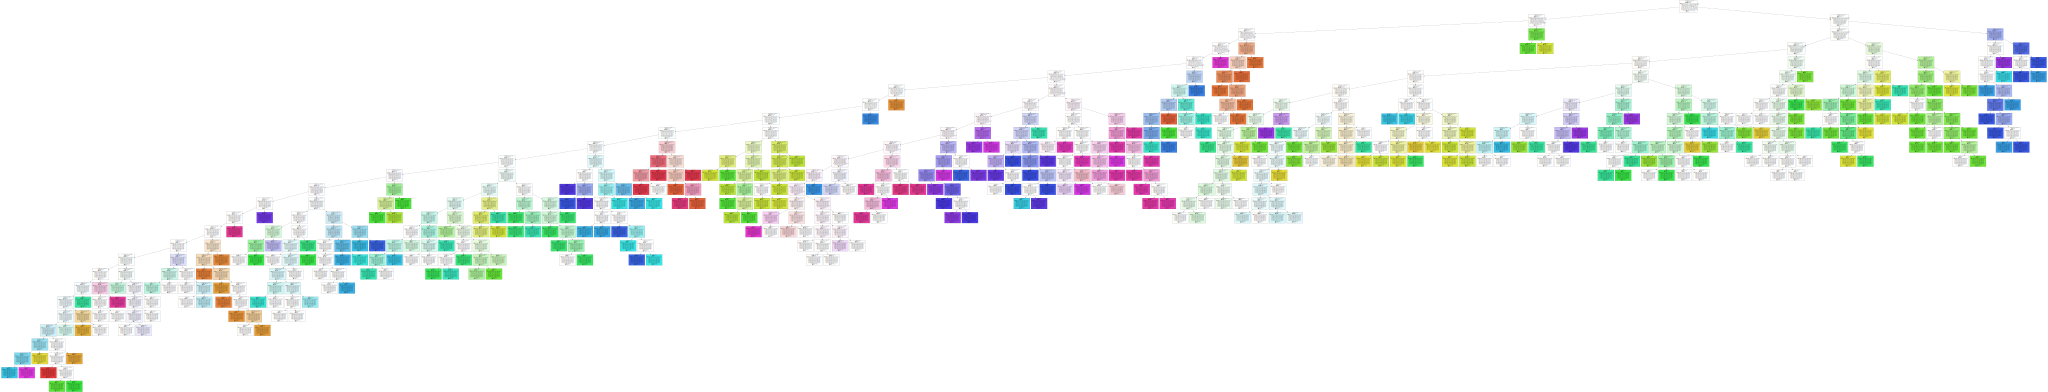

In [65]:
dotfit = tree.export_graphviz(fit, out_file = None, feature_names = dataX.columns, class_names = location_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(dotfit)
graph

In [66]:
# We can see that the tree has a depth of less than 50. We should try and change the hyperparameters to see if we can make it better

In [67]:
# We can use what we did in K Nearest Neighbour, using brute force
# The below code (Brute Force) will not work since the code crashes (overflow).

In [68]:
# # Change this value for more tests of hyperparameters
# maxValues = 50

In [69]:
# best_maxDepth = -1
# best_minSamplesSplit = -1
# best_minSamplesLeaf = -1
# best_maxFeaturesValueIndex = -1
# best_criterionValueIndex = -1

# maxDepth = 5
# criterionValue = ["gini", "entropy"]
# maxFeaturesValue = [None, "auto", "sqrt", "log2"]



# while(maxDepth <= maxValues) :
#     minSamplesSplit = 2
#     while(minSamplesSplit <= maxValues):
#         minSamplesLeaf = 1
#         while(minSamplesLeaf <= maxValues && minSamplesSplit > minSamplesLeaf):
#             maxFeaturesValueIndex = 0
#             while(maxFeaturesValueIndex < len(maxFeaturesValue)):
#                 criterionValueIndex = 0
#                 while(criterionValueIndex < len(criterionValue)):
#                     currentModel_f1score = 0

#                     # Applying crossfold validation
#                     for train_index, valid_index in kf.split(TrainValidX):
#                         trainX, validX = TrainValidX[train_index], TrainValidX[valid_index] 
#                         trainY, validY = TrainValidY[train_index], TrainValidY[valid_index]

#                         clf = tree.DecisionTreeClassifier(criterion = criterionValue[criterionValueIndex],
#                                                           max_features = maxFeaturesValue[maxFeaturesValueIndex],
#                                                           max_leaf_nodes = None,
#                                                           min_samples_leaf = minSamplesLeaf,
#                                                           min_samples_split = minSamplesSplit,
#                                                           max_depth = maxDepth)

#                         fit = clf.fit(trainX, trainY)
#                         predict = fit.predict(validX)

#                         cm = confusion_matrix(validY, predict)
#                         cr = classification_report(validY, predict)
#                         f1score = f1_score(validY, predict, average = "micro")
#                         currentModel_f1score = currentModel_f1score + f1score

#                         # Displaying confusion matrix, report and f1-score
#                         print(cm)
#                         print(cr)
#                         print("F1-score: " + str(f1score))
#                         print()

#                     # divide the total f1-score by 4 since there are 4 folds
#                     currentModel_f1score = currentModel_f1score / 4

#                     if(currentlyBest_f1score < currentModel_f1score):
#                         best_maxDepth = maxDepth
#                         best_minSamplesSplit = minSamplesSplit
#                         best_minSamplesLeaf = minSamplesLeaf
#                         best_maxFeaturesValueIndex = maxFeaturesValueIndex
#                         best_criterionValueIndex = criterionValueIndex

#                         currentlyBest_f1score = currentModel_f1score

#                     criterionValueIndex = criterionValueIndex + 1

#                 maxFeaturesValueIndex = maxFeaturesValueIndex + 1
            
#             minSamplesLeaf = minSamplesLeaf + 1
        
#         minSamplesSplit = minSamplesSplit + 1
    
#     maxDepth = maxDepth + 1

In [70]:
# One strategy to create a model quickly is to use a part of the concept from hill climbing
# The idea is that if by increasing the hyperparameter makes the metric score (f1-score) lesser than before,
# we can assume that increasing it further will reduce the metric score, and therefore will not increase the hyperparameter anymore

In [71]:
# There are 2 problems with this method to figure out the right hyperparameters
# 1) This does not work with well with hyperparameters that are defined by keywords.
#     hyperparameters like criterion (gini and entropy), can have significantly different values based on the other hyperparameters
# 2) This also does not work well when there are many hyperparameters to consider
#     assuming that hyperparameter A is at best = 10 and hyperparameter B is default
#     there is a possibility that when you start changing at hyperparameter B, it affects hyperparameter A, and the best value for A is no longer 10
#     this is clearly seen when we look at decision trees, where things like max_depth and min_samples_split can affect the way the decision tree model is trained

In [72]:
# Ultimately I have decided to adopt another strategy. Using theory to backup my hyperparameters.
# criterion = gini
#     Gini vs Entropy
#     While there is a difference in how it creates the decision tree model, it has little impact on which is better in predicting future data
#     However, I am going with gini index as entropy takes a longer computational time to calculate due to it having a log function, while gini doesnt
# max_features = (default = None)
#     Based on the above feature selection calculation, we have determined that all features have to be considered
# min_samples_split = 5
# min_samples_leaf = 2
# I have decided to give split = 5 and leaf = 2 to reduce overfitting. The default values of split = 2 and leaf = 1 might not be feasible when the data is very hard to predict well
# max_depth = (to be found)
# Sine I have no way to figure out this, and this is the only hyperparameter I have that is changing, I can used what I said above, the concept of hill climbing

In [73]:
best_maxDepth = -1
previousModel_f1score = -1
currentModel_f1score = -1
currentlyBest_f1score = -1
maxDepth = 5

stopModelling = False
while not stopModelling :
#     Applying crossfold validation
    currentModel_f1score = 0
    for train_index, valid_index in kf.split(TrainValidX):
        trainX, validX = TrainValidX[train_index], TrainValidX[valid_index] 
        trainY, validY = TrainValidY[train_index], TrainValidY[valid_index]
        
        clf = tree.DecisionTreeClassifier(criterion = "gini",
                                  max_features = None,
                                  max_leaf_nodes = None,
                                  min_samples_leaf = 2,
                                  min_samples_split = 5,
                                  max_depth = maxDepth,
                                  random_state = 10)

        fit = clf.fit(trainX, trainY)
        predict = fit.predict(validX)

        cm = confusion_matrix(validY, predict)
        cr = classification_report(validY, predict)
        f1score = f1_score(validY, predict, average = "micro")
        currentModel_f1score = currentModel_f1score + f1score

        # Displaying confusion matrix, report and f1-score
        print("Max Depth: " + str(maxDepth))
        print(cm)
        print(cr)
        print("F1-score: " + str(f1score))
        print()

    # divide the total f1-score by 4 since there are 4 folds
    currentModel_f1score = currentModel_f1score / 4

    if(previousModel_f1score < 0 or previousModel_f1score < currentModel_f1score):
        previousModel_f1score = currentModel_f1score
    elif(previousModel_f1score > currentModel_f1score):
        stopModelling = True
        best_maxDepth = maxDepth - 1
        currentlyBest_f1score = previousModel_f1score
    
    maxDepth = maxDepth + 1

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.00      0.00      0.00         3
         E15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         6
         I02       0.00      0.00      0.00         9
         I03       0.00      0.00      0.00         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.00      0.00      0.00        13
         I08       0.05      0.83      0.10         6
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

In [74]:
# Checking for best hyperparameters based on f1-score
print("Best Max Depth: " + str(best_maxDepth))
print("F1-score: " + str(currentlyBest_f1score))

Best Max Depth: 8
F1-score: 0.15404929577464788


In [75]:
# It doesnt make sense that the max depth of 8 is the best, since our first decision tree model with no hyperparameters gives us an f1-score of 0.3
# Seems like this method is flawed

In [76]:
# Now we shall try it again, except this time, we specify the depth to a max of 50

In [77]:
maxValue = 50

In [78]:
best_maxDepth = -1
currentModel_f1score = -1
currentlyBest_f1score = -1
maxDepth = 5

while(maxDepth <= maxValue):
#     Applying crossfold validation
    currentModel_f1score = 0
    for train_index, valid_index in kf.split(TrainValidX):
        trainX, validX = TrainValidX[train_index], TrainValidX[valid_index] 
        trainY, validY = TrainValidY[train_index], TrainValidY[valid_index]
        
        clf = tree.DecisionTreeClassifier(criterion = "gini",
                                  max_features = None,
                                  max_leaf_nodes = None,
                                  min_samples_leaf = 2,
                                  min_samples_split = 5,
                                  max_depth = maxDepth,
                                  random_state = 10)

        fit = clf.fit(trainX, trainY)
        predict = fit.predict(validX)

        cm = confusion_matrix(validY, predict)
        cr = classification_report(validY, predict)
        f1score = f1_score(validY, predict, average = "micro")
        currentModel_f1score = currentModel_f1score + f1score

        # Displaying confusion matrix, report and f1-score
        print("Max Depth: " + str(maxDepth))
        print(cm)
        print(cr)
        print("F1-score: " + str(f1score))
        print()

    # divide the total f1-score by 4 since there are 4 folds
    currentModel_f1score = currentModel_f1score / 4

    if(currentlyBest_f1score < currentModel_f1score):
        currentlyBest_f1score = currentModel_f1score
        best_maxDepth = maxDepth
    
    maxDepth = maxDepth + 1

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.00      0.00      0.00         3
         E15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         6
         I02       0.00      0.00      0.00         9
         I03       0.00      0.00      0.00         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.00      0.00      0.00        13
         I08       0.05      0.83      0.10         6
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         4
         D14       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.14      1.00      0.25         4
         I02       0.10      0.33      0.15         3
         I03       0.00      0.00      0.00         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.57      0.50      0.53         8
         I07       0.00      0.00      0.00         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.00      0.00      0.00         1
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 8
[[0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       1.00      0.17      0.29         6
         I07       0.00      0.00      0.00         1
         I08       0.20      0.25      0.22         4
         I09       0.00      0.00      0.00         1
         I10       0.67      1.00      0.80         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 11
[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.33      0.50      0.40         6
         I02       0.00      0.00      0.00         9
         I03       0.50      0.50      0.50         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.50      0.08      0.13        13
         I08       0.44      0.67      0.53         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 12
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.00      0.00      0.00         1
         I08       0.75      0.60      0.67         5
         I09       0.33      1.00      0.50         1
         I10       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 13
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         4
         D14       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.09      0.25      0.13         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.33      0.38      0.35         8
         I07       0.00      0.00      0.00         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.18      1.00      0.31         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.50      0.08      0.13        13
         I08       0.44      0.67      0.53         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       1.00      1.00      1.00         1
         J02       0.00      0.00      0.00         3
         J03  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 16
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.67      0.40      0.50         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 17
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.67      0.33      0.44         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
         I15       0.00      0.00      0.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 19
[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.15      1.00      0.27         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.43      0.23      0.30        13
         I08       0.44      0.67      0.53         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
         J01  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 21
[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.33      0.38      0.35         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.17      1.00      0.29         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.17      0.17      0.17         6
         I07       0.43      0.23      0.30        13
         I08       0.50      0.50      0.50         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       1.00      1.00      1.00         1
         J01       0.00      0.00      0.00         0
         J02  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 24
[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 26
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.67      0.33      0.44         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 27
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.25      0.33      0.29         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 29
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 30
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.25      0.33      0.29         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 32
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 33
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 35
[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.17      1.00      0.29         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.17      0.17      0.17         6
         I07       0.43      0.23      0.30        13
         I08       0.50      0.50      0.50         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
         J01  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
         J01  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 38
[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.25      0.33      0.29         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
         I15   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 41
[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.25      0.33      0.29         6
         I07       0.14      1.00      0.25         1
         I08       0.33      0.25      0.29         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 43
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 44
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.20      0.67      0.31         3
         I07       0.12      1.00      0.22         1
         I08       0.33      0.40      0.36         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.17      1.00      0.29         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.17      0.17      0.17         6
         I07       0.43      0.23      0.30        13
         I08       0.50      0.50      0.50         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
         J02   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 47
[[0 1 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.60      1.00      0.75         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.17      1.00      0.29         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.17      0.17      0.17         6
         I07       0.43      0.23      0.30        13
         I08       0.50      0.50      0.50         6
         I09       0.00      0.00      0.00         1
         I10       0.40      0.67      0.50         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 48
[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 49
[[3 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.75      0.86         4
         D14       0.00      0.00      0.00         1
         D15       0.33      1.00      0.50         1
         F08       0.50      0.50      0.50         2
         G15       1.00      1.00      1.00         1
         I01       0.10      0.50      0.16         4
         I02       0.06      0.33      0.11         3
         I03       0.08      0.25      0.12         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.38      0.38      0.38         8
         I07       0.33      0.33      0.33         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

In [79]:
# Checking for best hyperparameters based on f1-score
print("Best Max Depth: " + str(best_maxDepth))
print("F1-score: " + str(currentlyBest_f1score))

Best Max Depth: 26
F1-score: 0.23943661971830987


In [80]:
# While the max_depth seems like about right, it seems that my theory is wrong as the f1-score is still lesser. 
# For now lets stick to default parameters

In [81]:
best_maxDepth = -1
currentModel_f1score = -1
currentlyBest_f1score = -1
maxDepth = 5

while(maxDepth <= maxValue):
#     Applying crossfold validation
    currentModel_f1score = 0
    for train_index, valid_index in kf.split(TrainValidX):
        trainX, validX = TrainValidX[train_index], TrainValidX[valid_index] 
        trainY, validY = TrainValidY[train_index], TrainValidY[valid_index]
        
        clf = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state = 10)

        fit = clf.fit(trainX, trainY)
        predict = fit.predict(validX)

        cm = confusion_matrix(validY, predict)
        cr = classification_report(validY, predict)
        f1score = f1_score(validY, predict, average = "micro")
        currentModel_f1score = currentModel_f1score + f1score

        # Displaying confusion matrix, report and f1-score
        print("Max Depth: " + str(maxDepth))
        print(cm)
        print(cr)
        print("F1-score: " + str(f1score))
        print()

    # divide the total f1-score by 4 since there are 4 folds
    currentModel_f1score = currentModel_f1score / 4

    if(currentlyBest_f1score < currentModel_f1score):
        currentlyBest_f1score = currentModel_f1score
        best_maxDepth = maxDepth
    
    maxDepth = maxDepth + 1

Max Depth: 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.00      0.00      0.00         3
         E15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         6
         I02       0.00      0.00      0.00         9
         I03       0.00      0.00      0.00         2
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.00      0.00      0.00        13
         I08       0.05      0.83      0.10         6
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.00      0.00      0.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         3
         I03       0.00      0.00      0.00         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.11      0.67      0.18         3
         I07       0.00      0.00      0.00         1
         I08       0.05      1.00      0.10         5
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       0.00      0.00      0.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         3
         I03       0.00      0.00      0.00         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.11      0.67      0.18         3
         I07       0.00      0.00      0.00         1
         I08       0.05      1.00      0.10         5
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
         I15   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 7
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D14       0.00      0.00      0.00         2
         D15       0.00      0.00      0.00         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       1.00      0.33      0.50         6
         I07       0.00      0.00      0.00         1
         I08       0.22      0.50      0.31         4
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dar

Max Depth: 8
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.15      1.00      0.26         3
         I02       0.00      0.00      0.00         3
         I03       0.00      0.00      0.00         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.17      0.67      0.27         3
         I07       0.00      0.00      0.00         1
         I08       0.06      1.00      0.11         5
         I09       0.00      0.00      0.00         1
         I10       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 9
[[0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       1.00      0.33      0.50         6
         I07       0.00      0.00      0.00         1
         I08       0.33      0.50      0.40         4
         I09       0.00      0.00      0.00         1
         I10       0.67      1.00      0.80         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 10
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         4
         D14       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.29      0.50      0.36         4
         I02       0.08      0.33      0.12         3
         I03       0.20      0.50      0.29         4
         I04       0.00      0.00      0.00         3
         I05       0.00      0.00      0.00         5
         I06       0.50      0.12      0.20         8
         I07       0.00      0.00      0.00         3
         I08       0.00      0.00      0.00         6
         I09       0.00      0.00      0.00         2
         I10       0.14      1.00      0.25         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 11
[[0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       1.00      0.50      0.67         6
         I07       0.00      0.00      0.00         1
         I08       1.00      0.25      0.40         4
         I09       0.00      0.00      0.00         1
         I10       0.50      0.50      0.50         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 12
[[0 1 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D14       0.00      0.00      0.00         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       1.00      0.50      0.67         6
         I07       0.00      0.00      0.00         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.33      0.50      0.40         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 13
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         4
         D14       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.29      0.50      0.36         4
         I02       0.06      0.33      0.10         3
         I03       0.15      0.50      0.24         4
         I04       0.33      0.33      0.33         3
         I05       0.00      0.00      0.00         5
         I06       0.67      0.25      0.36         8
         I07       0.00      0.00      0.00         3
         I08       1.00      0.17      0.29         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 14
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.33      1.00      0.50         1
         I08       0.50      0.60      0.55         5
         I09       1.00      1.00      1.00         1
         I10       0.67      0.67      0.67         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 15
[[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.50      0.60      0.55         5
         I09       1.00      1.00      1.00         1
         I10       0.67      0.67      0.67         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 16
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         4
         D14       0.00      0.00      0.00         1
         D15       1.00      1.00      1.00         1
         F08       0.00      0.00      0.00         2
         G15       0.00      0.00      0.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.15      0.50      0.24         4
         I04       0.33      0.33      0.33         3
         I05       0.00      0.00      0.00         5
         I06       0.29      0.25      0.27         8
         I07       0.14      0.33      0.20         3
         I08       1.00      0.17      0.29         6
         I09       0.00      0.00      0.00         2
         I10       0.25      1.00      0.40         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 17
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.25      0.60      0.35         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 18
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 20
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       0.75      1.00      0.86         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.17      1.00      0.29         2
         I04       0.08      0.33      0.13         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.75      0.23      0.35        13
         I08       0.50      0.67      0.57         6
         I09       0.00      0.00      0.00         1
         I10       0.50      1.00      0.67         3
         I15       0.00      0.00      0.00         1
         J02       0.00      0.00      0.00         3
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 20
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       1.00      0.50      0.67         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.75      0.50      0.60         6
         I07       0.50      1.00      0.67         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.50      0.50      0.50         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 21
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       0.00      0.00      0.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.33      1.00      0.50         1
         I08       0.38      0.60      0.46         5
         I09       1.00      1.00      1.00         1
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 24
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       0.75      1.00      0.86         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.18      1.00      0.31         2
         I04       0.08      0.33      0.13         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.75      0.23      0.35        13
         I08       0.50      0.67      0.57         6
         I09       1.00      1.00      1.00         1
         I10       0.60      1.00      0.75         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 25
[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.25      0.40         4
         D14       0.00      0.00      0.00         1
         D15       0.50      1.00      0.67         1
         E15       0.00      0.00      0.00         0
         F08       1.00      0.50      0.67         2
         G15       1.00      1.00      1.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.14      0.50      0.22         4
         I04       0.33      0.33      0.33         3
         I05       0.00      0.00      0.00         5
         I06       0.29      0.25      0.27         8
         I07       0.14      0.33      0.20         3
         I08       0.12      0.17      0.14         6
         I09       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 26
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 28
[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.25      0.40         4
         D14       0.00      0.00      0.00         1
         D15       0.50      1.00      0.67         1
         E15       0.00      0.00      0.00         0
         F08       1.00      0.50      0.67         2
         G15       1.00      1.00      1.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.14      0.50      0.22         4
         I04       0.25      0.33      0.29         3
         I05       0.00      0.00      0.00         5
         I06       0.29      0.25      0.27         8
         I07       0.14      0.33      0.20         3
         I08       0.12      0.17      0.14         6
         I09       0.00      0.00      0.00         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 31
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       1.00      0.50      0.67         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.40      0.67      0.50         6
         I07       0.50      1.00      0.67         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.33      0.50      0.40         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 34
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.25      0.40         4
         D14       0.00      0.00      0.00         1
         D15       0.50      1.00      0.67         1
         E15       0.00      0.00      0.00         0
         F08       1.00      0.50      0.67         2
         G15       1.00      1.00      1.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.14      0.50      0.22         4
         I04       0.25      0.33      0.29         3
         I05       0.00      0.00      0.00         5
         I06       0.29      0.25      0.27         8
         I07       0.14      0.33      0.20         3
         I08       0.12      0.17      0.14         6
         I09       0.00      0.00      0.00         2
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 39
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       1.00      0.50      0.67         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.40      0.67      0.50         6
         I07       0.50      1.00      0.67         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.33      0.50      0.40         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       1.00      0.50      0.67         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.40      0.67      0.50         6
         I07       0.50      1.00      0.67         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.33      0.50      0.40         2
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         3
         J02       0.00    

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 5]]
              precision    recall  f1-score   support

         D13       1.00      0.25      0.40         4
         D14       0.00      0.00      0.00         1
         D15       0.50      1.00      0.67         1
         E15       0.00      0.00      0.00         0
         F08       1.00      0.50      0.67         2
         G15       1.00      1.00      1.00         1
         I01       0.12      0.50      0.19         4
         I02       0.06      0.33      0.10         3
         I03       0.14      0.50      0.22         4
         I04       0.25      0.33      0.29         3
         I05       0.00      0.00      0.00         5
         I06       0.29      0.25      0.27         8
         I07       0.14      0.33      0.20         3
         I08       0.12      0.17      0.14         6
         I09       0.00      0.00      0.00         2
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 43
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       0.75      1.00      0.86         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.18      1.00      0.31         2
         I04       0.08      0.33      0.13         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.75      0.23      0.35        13
         I08       0.50      0.67      0.57         6
         I09       0.00      0.00      0.00         1
         I10       0.50      1.00      0.67         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 44
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 45
[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 4]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       1.00      0.50      0.67         2
         D15       0.67      0.50      0.57         4
         E15       0.00      0.00      0.00         1
         G15       0.00      0.00      0.00         0
         I01       0.00      0.00      0.00         2
         I02       0.00      0.00      0.00         4
         I03       0.00      0.00      0.00         5
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         1
         I06       0.40      0.67      0.50         6
         I07       0.50      1.00      0.67         1
         I08       0.50      0.25      0.33         4
         I09       0.00      0.00      0.00         1
         I10       0.33      0.50      0.40         2
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 46
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       0.75      1.00      0.86         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.18      1.00      0.31         2
         I04       0.08      0.33      0.13         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.75      0.23      0.35        13
         I08       0.50      0.67      0.57         6
         I09       0.00      0.00      0.00         1
         I10       0.50      1.00      0.67         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li

Max Depth: 48
[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.50      1.00      0.67         1
         D15       0.75      1.00      0.86         3
         E15       0.00      0.00      0.00         2
         I01       0.23      0.50      0.32         6
         I02       0.00      0.00      0.00         9
         I03       0.18      1.00      0.31         2
         I04       0.08      0.33      0.13         3
         I05       0.00      0.00      0.00         4
         I06       0.00      0.00      0.00         6
         I07       0.75      0.23      0.35        13
         I08       0.50      0.67      0.57         6
         I09       0.00      0.00      0.00         1
         I10       0.50      1.00      0.67         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         0
 

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Darren\Anaconda3\li


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       1.00      1.00      1.00         1
         D14       0.00      0.00      0.00         0
         D15       1.00      1.00      1.00         2
         E15       0.00      0.00      0.00         1
         F08       0.50      1.00      0.67         1
         G15       1.00      1.00      1.00         2
         I01       0.25      1.00      0.40         3
         I02       0.00      0.00      0.00         3
         I03       1.00      0.14      0.25         7
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         4
         I06       0.25      0.67      0.36         3
         I07       0.50      1.00      0.67         1
         I08       0.33      0.60      0.43         5
         I09       1.00      1.00      1.00         1
         I10  

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [82]:
# Checking for best hyperparameters based on f1-score
print("Best Max Depth: " + str(best_maxDepth))
print("F1-score: " + str(currentlyBest_f1score))

Best Max Depth: 26
F1-score: 0.2834507042253521


In [83]:
# Therefore, the best depth is when max_depth = 26, and with default hyperparameters.

In [84]:
main_dtModel = tree.DecisionTreeClassifier(max_depth = best_maxDepth, random_state = 10)
main_dtModel = main_dtModel.fit(finalTrainX, finalTrainY)
predictValid = main_dtModel.predict(finalValidX)
cm = confusion_matrix(finalValidY, predictValid)
cr = classification_report(finalValidY, predictValid)
f1score = f1_score(finalValidY, predictValid, average = "micro")

# Displaying confusion matrix, report and f1-score
print(cm)
print(cr)
print("F1-score: " + str(f1score))
print()

[[2 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

         D13       0.67      1.00      0.80         2
         D14       0.00      0.00      0.00         1
         E15       0.00      0.00      0.00         1
         G15       1.00      1.00      1.00         1
         I01       0.25      1.00      0.40         2
         I02       0.12      0.20      0.15         5
         I03       0.33      0.50      0.40         2
         I04       0.00      0.00      0.00         2
         I05       0.00      0.00      0.00         2
         I06       0.71      0.83      0.77         6
         I07       0.33      0.67      0.44         6
         I08       0.50      0.14      0.22         7
         I09       1.00      0.33      0.50         3
         I10       0.33      1.00      0.50         1
         I15       0.00      0.00      0.00         0
         J01   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [85]:
# Using main DT model to predict unseen/testing data

In [86]:
predictTest = main_dtModel.predict(testX)
cm = confusion_matrix(testY, predictTest)
cr = classification_report(testY, predictTest)
f1score = f1_score(testY, predictTest, average = "micro")

# Displaying confusion matrix, report and f1-score
print(cm)
print(cr)
print("F1-score: " + str(f1score))
print()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]]
              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         0
         D14       0.00      0.00      0.00         1
         D15       1.00      0.50      0.67         4
         E15       0.00      0.00      0.00         0
         F08       1.00      1.00      1.00         1
         G15       1.00      1.00      1.00         1
         I01       0.00      0.00      0.00         3
         I02       0.00      0.00      0.00         2
         I03       0.50      1.00      0.67         1
         I04       0.00      0.00      0.00         4
         I05       0.00      0.00      0.00         5
         I06       0.67      1.00      0.80         4
         I07       0.44      0.44      0.44         9
         I08       0.57      0.80      0.67         5
         I09       1.00      1.00      1.00         3
         I10   

C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Darren\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


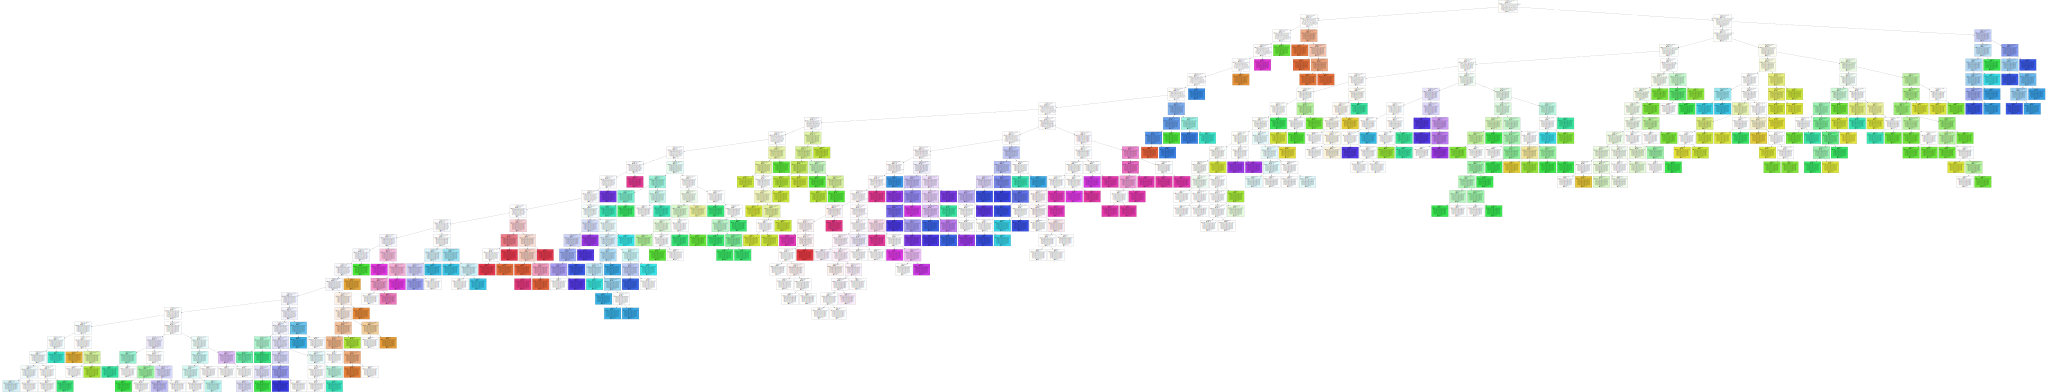

In [87]:
main_dtModel_dot = tree.export_graphviz(main_dtModel, out_file = None, feature_names = dataX.columns, class_names = location_labels, filled=True, rounded=False, special_characters=True)
graph = graphviz.Source(main_dtModel_dot)
graph